In [33]:
import os
import random
import joblib
import argparse

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
from sklearn.manifold import TSNE

from skimage.transform import rescale

import tensorflow as tf
from baselines.common.tf_util import load_variables
from baselines import deepq
from baselines.run import train
import gym

import sys
sys.path.append('..')
from gym_recorder.recorder import Recorder
from gym_recorder.utils import shortlist_operations, get_activations
from gym_recorder.perturb import perturb

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
arguments = dict(alg='deepq',
            env='PongNoFrameskip-v4', 
            gamestate=None,
            network=None,
            num_env=None, 
            num_timesteps=0.0, 
            play=True, 
            reward_scale=1.0, 
            save_path=None, 
            seed=None)

extra_arguments = dict(load_path='../../models/pong_1e6_dqn')

parser = argparse.ArgumentParser()
for key in arguments:
    parser.add_argument(f'--{key}')

extra_parser = argparse.ArgumentParser()
for key in extra_arguments:
    extra_parser.add_argument(f'--{key}')

args = parser.parse_args('')
extra_args = parser.parse_args('')

args.alg = 'deepq'
args.env='EnduroNoFrameskip-v4'
args.gamestate=None
args.network=None
args.num_env=None
args.num_timesteps=0.0
args.play=True
args.reward_scale=1.0
args.save_path=None
args.seed=None

extra_args = dict(load_path='../models/enduro_0_dqn')

model, env = train(args, extra_args)

env_type: atari
Training deepq on atari:EnduroNoFrameskip-v4 with arguments 
{'network': 'conv_only', 'lr': 0.0001, 'buffer_size': 10000, 'exploration_fraction': 0.1, 'exploration_final_eps': 0.01, 'train_freq': 4, 'learning_starts': 10000, 'target_network_update_freq': 1000, 'gamma': 0.99, 'prioritized_replay': True, 'prioritized_replay_alpha': 0.6, 'checkpoint_freq': 10000, 'checkpoint_path': None, 'dueling': True, 'load_path': '../models/enduro_0_dqn'}
Loaded model from ../models/enduro_0_dqn


In [3]:
# Set parameters
session = tf.get_default_session()
n_episodes = 1
operations = {'q_values': 'deepq/q_func/action_value/fully_connected_1/MatMul',
              '2nd_to_last': 'deepq_1/q_func/convnet/Conv_2/Relu'}
input1 = session.graph.get_operation_by_name('deepq/observation').outputs[0]
input2 = session.graph.get_operation_by_name('deepq_1/obs_t').outputs[0]

In [4]:
# Record gameplay
recorder = Recorder(act=model, env=env, operations=operations)
recorder.record(
    session=session,
    feed_operations=([input1, input2]), 
    max_episodes=1,
#     max_steps=3000,
    sample_modulo=1
)

2019-01-31 16:18:14,811 Start recording for None steps or 1 episodes with a sample modulo of 1


INFO:tensorflow:Starting video with frame shape: (210, 160, 3)


2019-01-31 16:18:16,111 Step 100 in episode 1
2019-01-31 16:18:17,436 Step 200 in episode 1
2019-01-31 16:18:18,564 Step 300 in episode 1
2019-01-31 16:18:19,610 Step 400 in episode 1
2019-01-31 16:18:20,677 Step 500 in episode 1
2019-01-31 16:18:21,864 Step 600 in episode 1
2019-01-31 16:18:23,237 Step 700 in episode 1
2019-01-31 16:18:24,430 Step 800 in episode 1
2019-01-31 16:18:25,627 Step 900 in episode 1
2019-01-31 16:18:26,932 Step 1000 in episode 1
2019-01-31 16:18:28,042 Step 1100 in episode 1
2019-01-31 16:18:29,156 Step 1200 in episode 1
2019-01-31 16:18:30,270 Step 1300 in episode 1
2019-01-31 16:18:31,521 Step 1400 in episode 1
2019-01-31 16:18:32,664 Step 1500 in episode 1
2019-01-31 16:18:33,789 Step 1600 in episode 1
2019-01-31 16:18:34,902 Step 1700 in episode 1
2019-01-31 16:18:36,057 Step 1800 in episode 1
2019-01-31 16:18:37,178 Step 1900 in episode 1
2019-01-31 16:18:38,327 Step 2000 in episode 1
2019-01-31 16:18:39,476 Step 2100 in episode 1
2019-01-31 16:18:40,60

INFO:tensorflow:Finished recording episode


2019-01-31 16:18:53,738 Done recording 3320 steps with a sample modulo of 1 in 38.9 seconds


In [5]:
!pwd

/Users/andrew/git/fabian/notebooks


In [6]:
len(recorder.observations)

3320

In [7]:
recorder.observations = [ob for ix, ob in enumerate(recorder.observations) if (ix%5==0) and (ix<500)]

In [18]:
from skimage.io import imsave
import glob

for ix, frame in enumerate(recorder.frames[0:10]):
    
    filename = '/{:08}.png'.format(ix)
    folder = os.path.abspath("../saliency2")
    imsave(folder+filename, frame)

In [19]:
step_size = 4
recorder.get_saliencies(session=session,
                        operation_name='deepq/q_func/action_value/fully_connected_1/MatMul',
                        feed_operations=[input1, input2],
                        step_size=step_size,
                        mode='clipping'
                       )

2019-01-31 16:39:59,695 Computing saliency 1 of 100.
2019-01-31 16:40:03,192 Computing saliency 2 of 100.
2019-01-31 16:40:06,454 Computing saliency 3 of 100.
2019-01-31 16:40:09,719 Computing saliency 4 of 100.
2019-01-31 16:40:13,003 Computing saliency 5 of 100.
2019-01-31 16:40:16,301 Computing saliency 6 of 100.
2019-01-31 16:40:19,568 Computing saliency 7 of 100.
2019-01-31 16:40:22,845 Computing saliency 8 of 100.
2019-01-31 16:40:26,123 Computing saliency 9 of 100.
2019-01-31 16:40:29,372 Computing saliency 10 of 100.
2019-01-31 16:40:32,639 Computing saliency 11 of 100.
2019-01-31 16:40:35,904 Computing saliency 12 of 100.
2019-01-31 16:40:39,167 Computing saliency 13 of 100.
2019-01-31 16:40:42,437 Computing saliency 14 of 100.
2019-01-31 16:40:45,699 Computing saliency 15 of 100.
2019-01-31 16:40:48,968 Computing saliency 16 of 100.
2019-01-31 16:40:52,234 Computing saliency 17 of 100.
2019-01-31 16:40:55,496 Computing saliency 18 of 100.
2019-01-31 16:40:58,753 Computing sal

In [20]:
!ls

enduro.ipynb logs2


In [21]:
! open ..

In [22]:
from skimage.io import imsave
for ix, frame in enumerate(recorder.saliencies):
    filename = '../saliencies_random/{:08}.png'.format(ix)
    imsave(filename, frame)

/Users/andrew/anaconda3/envs/p36/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


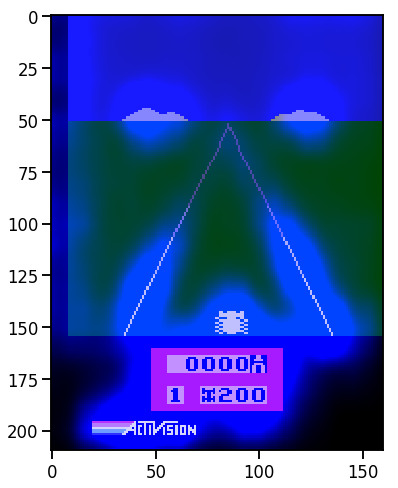

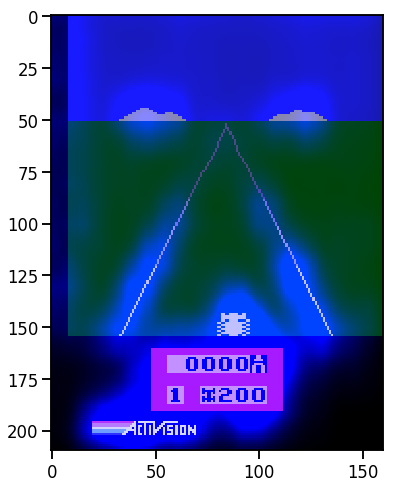

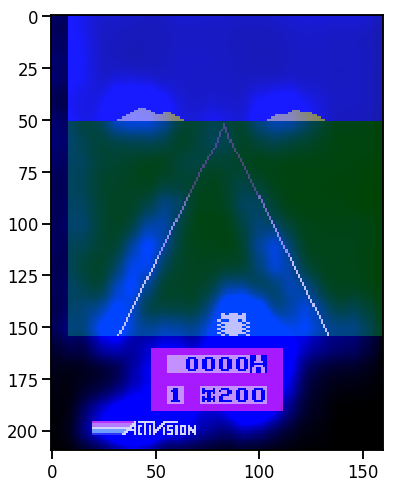

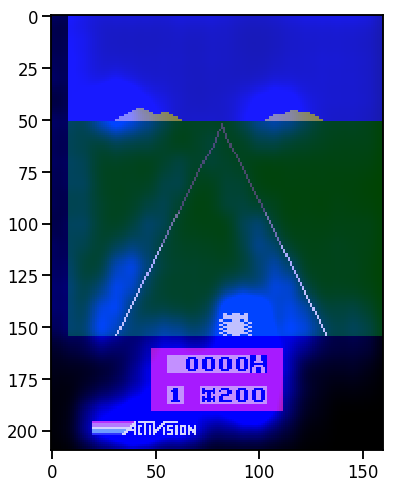

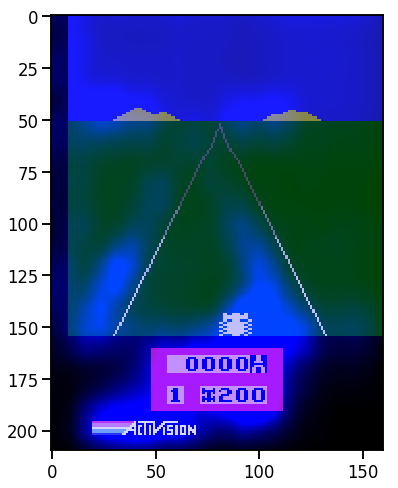

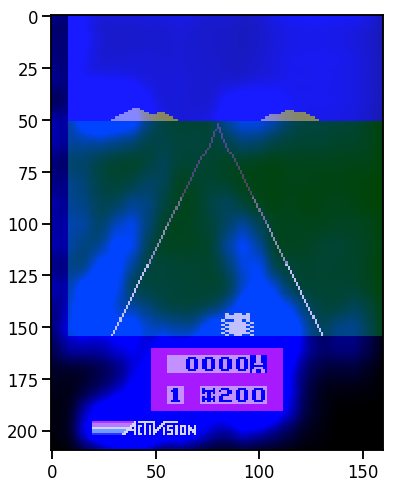

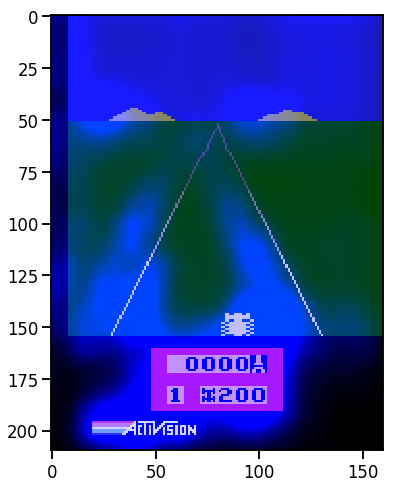

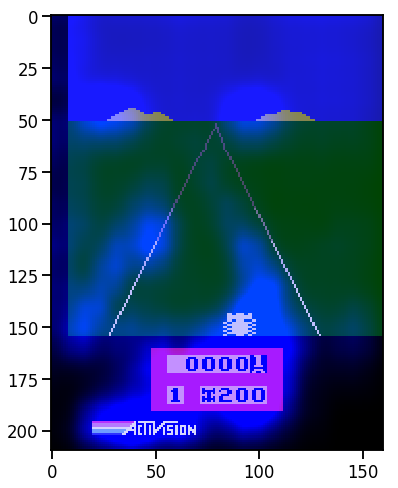

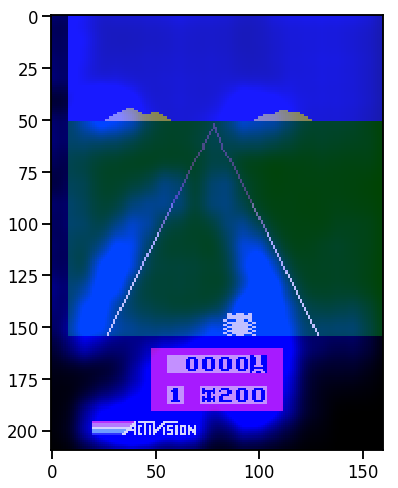

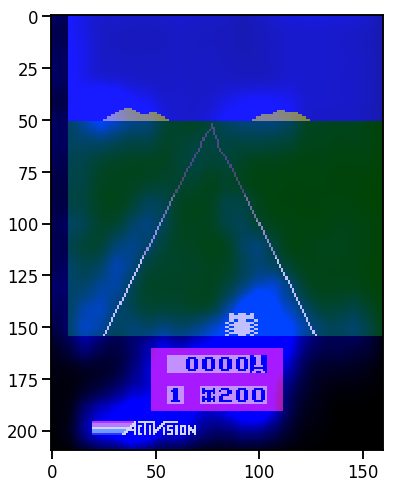

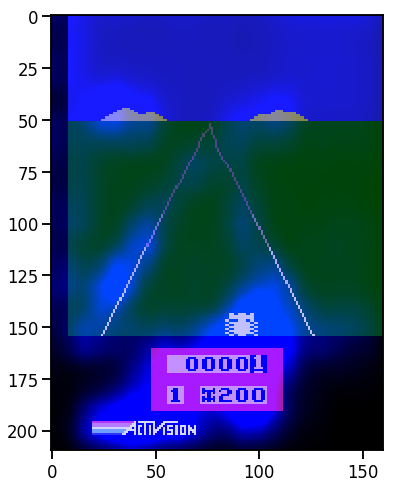

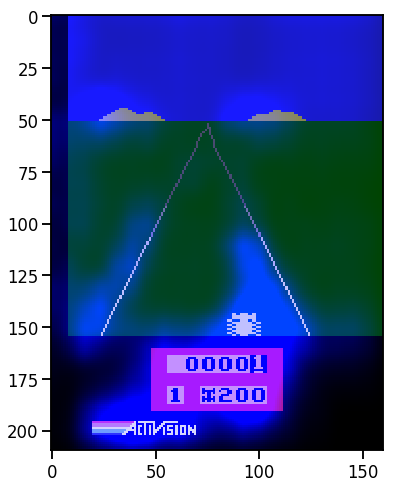

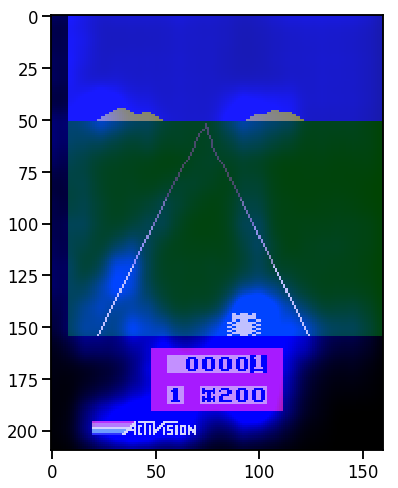

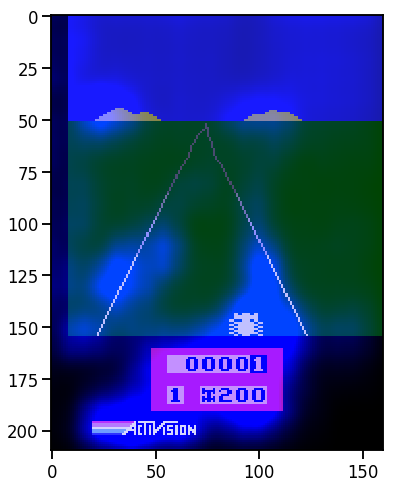

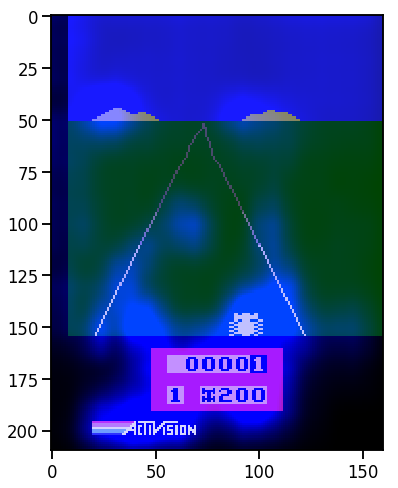

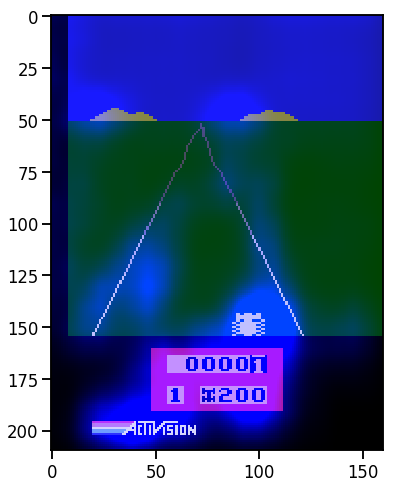

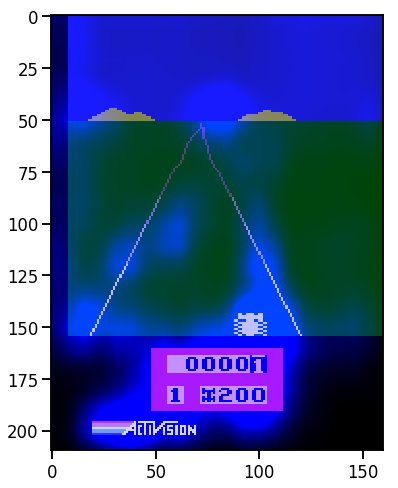

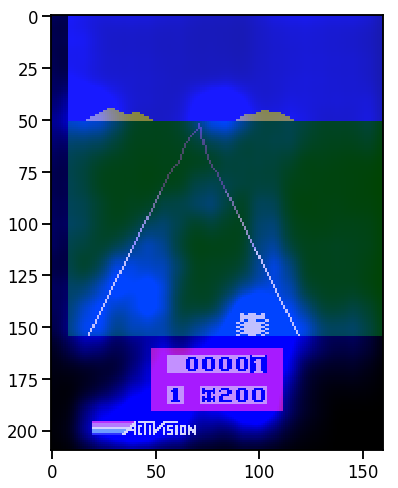

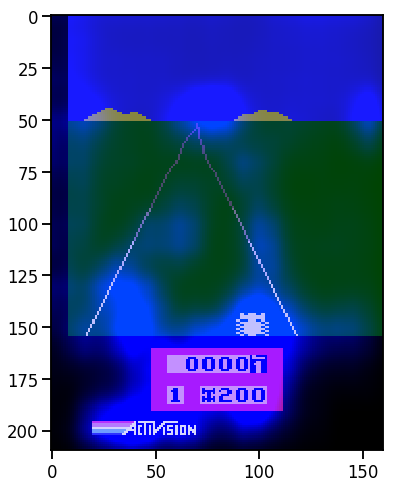

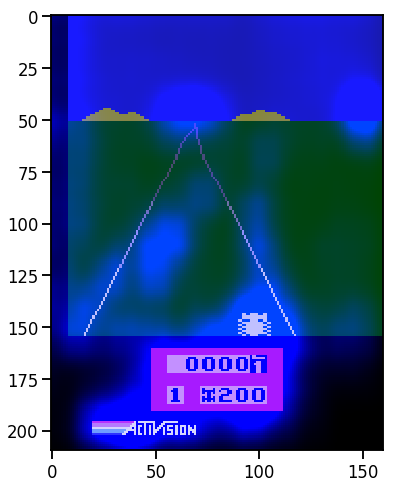

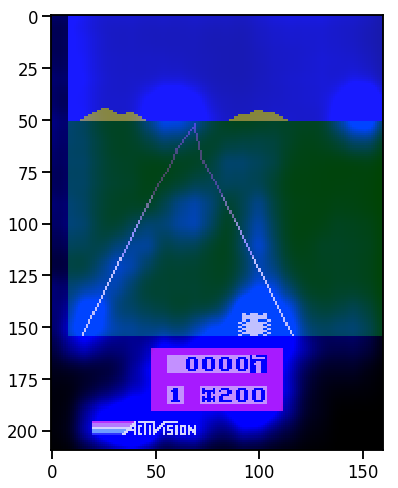

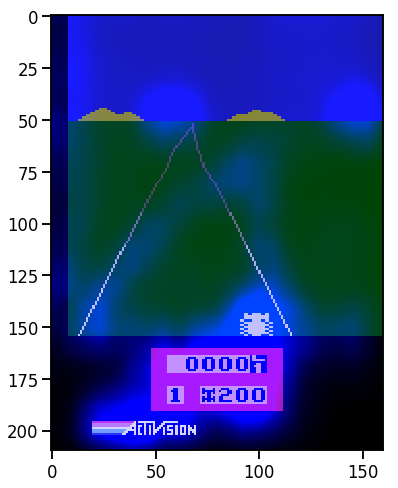

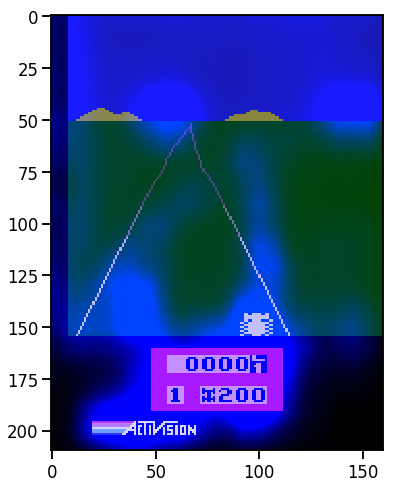

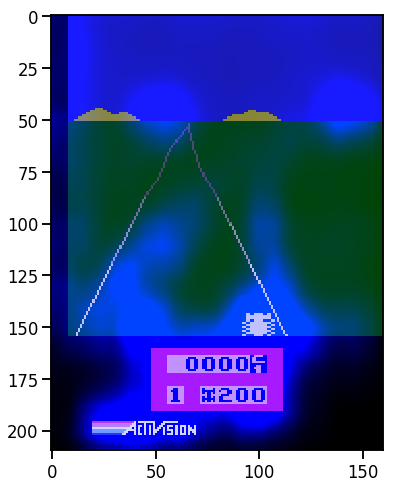

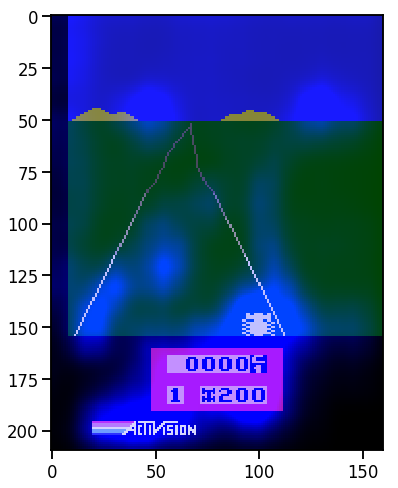

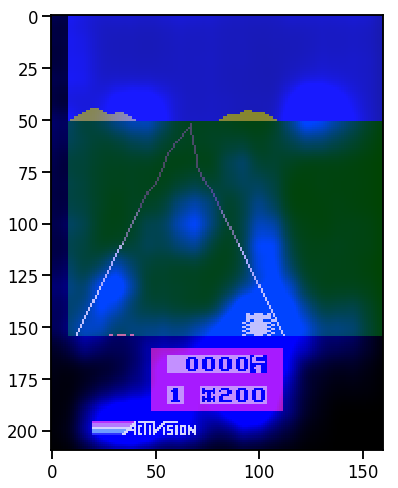

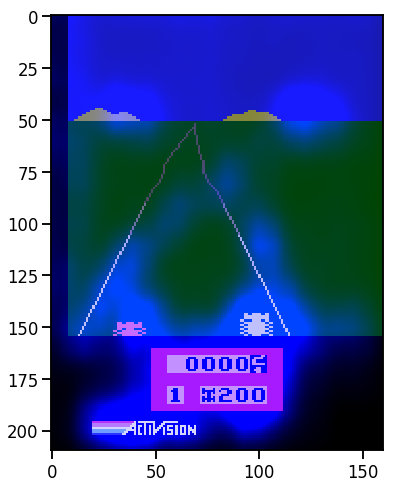

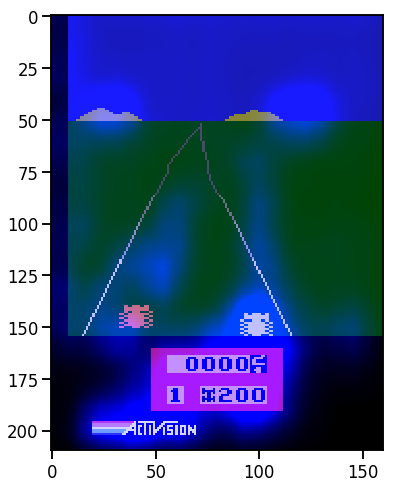

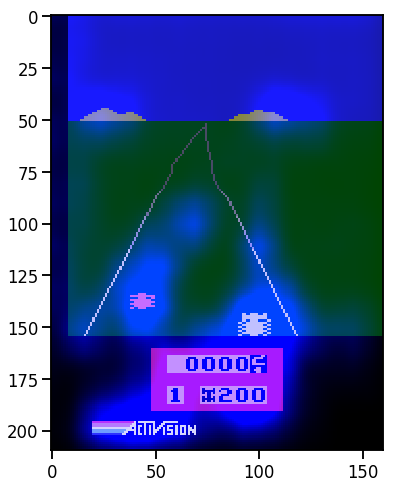

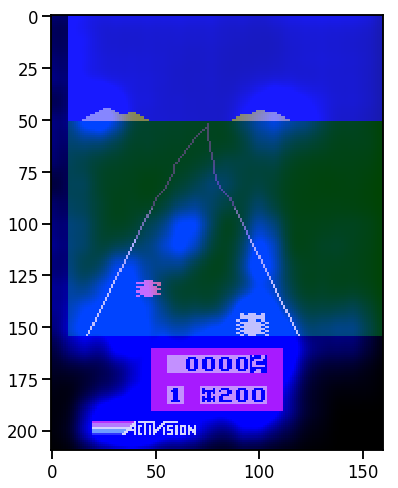

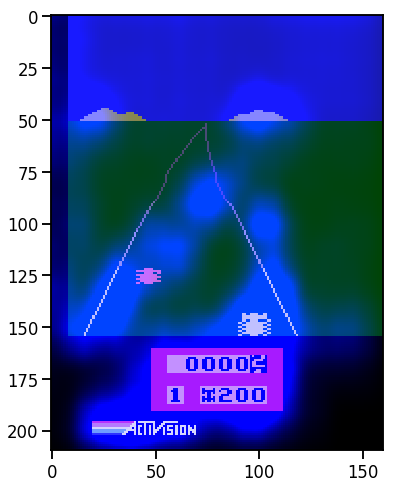

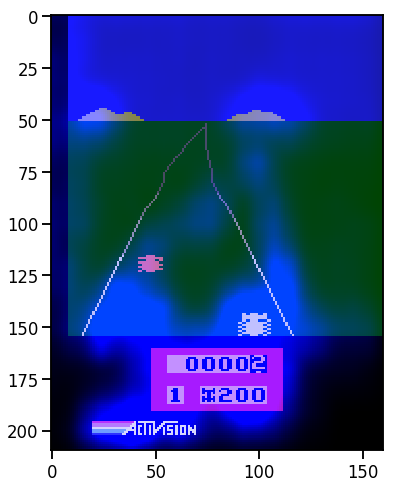

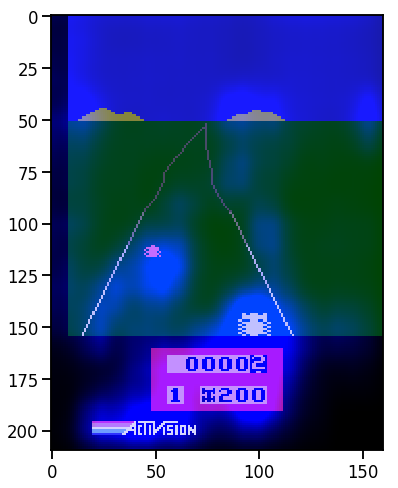

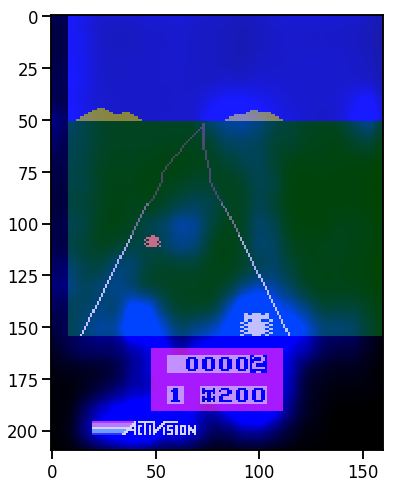

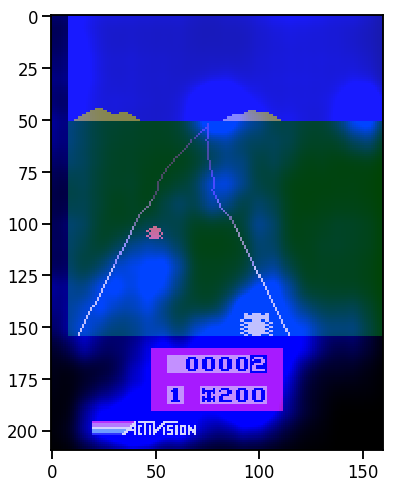

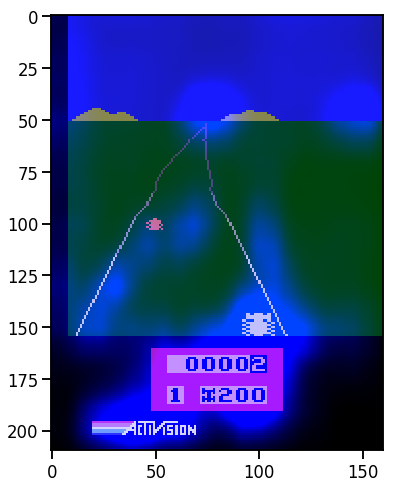

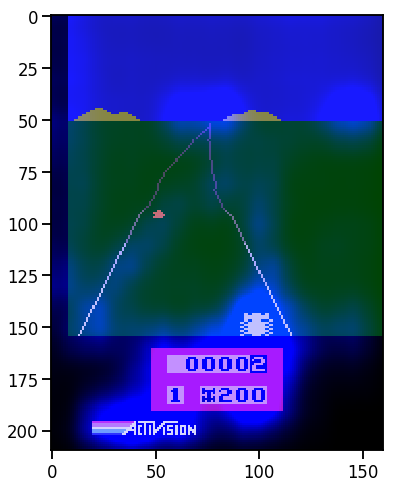

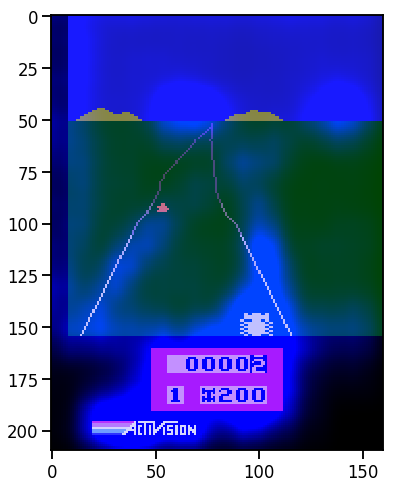

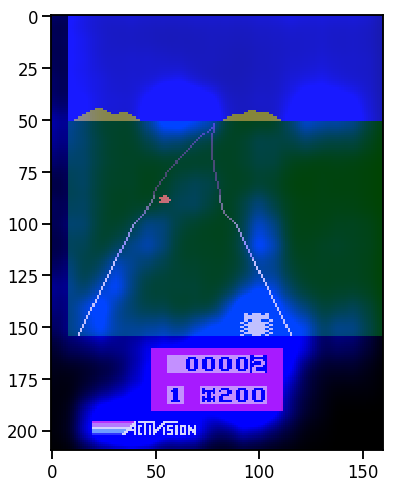

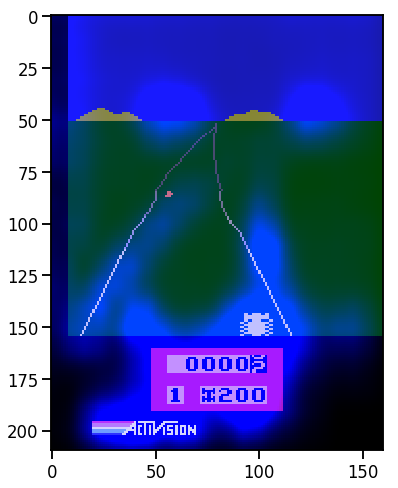

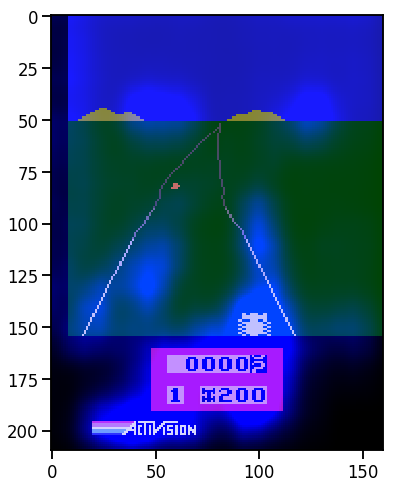

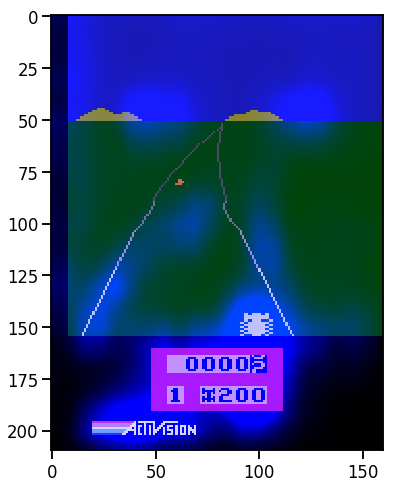

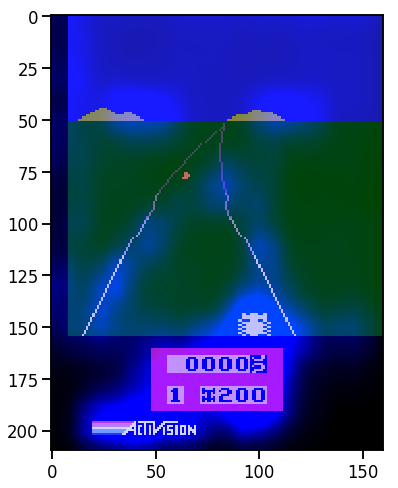

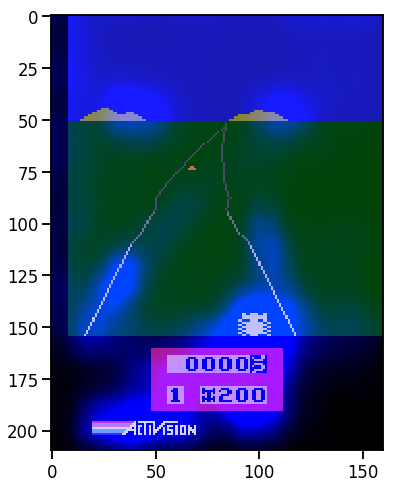

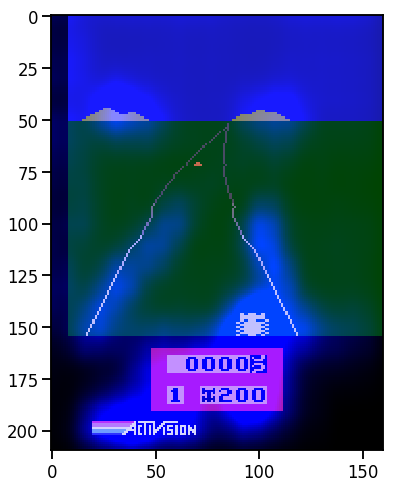

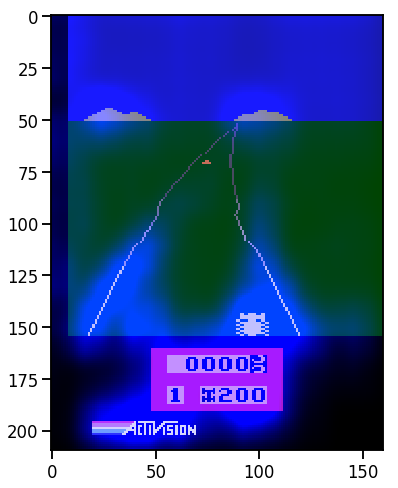

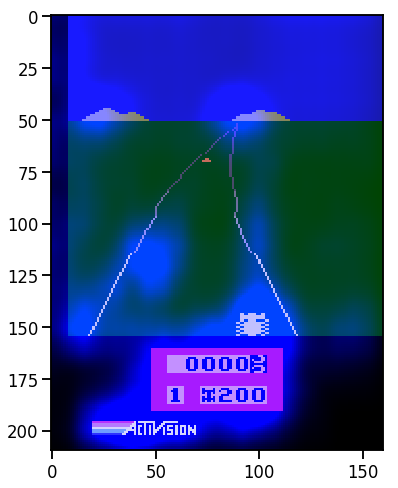

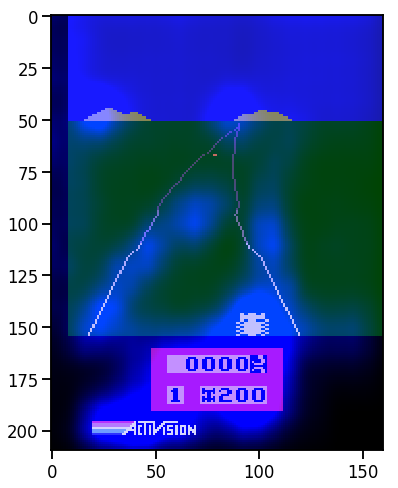

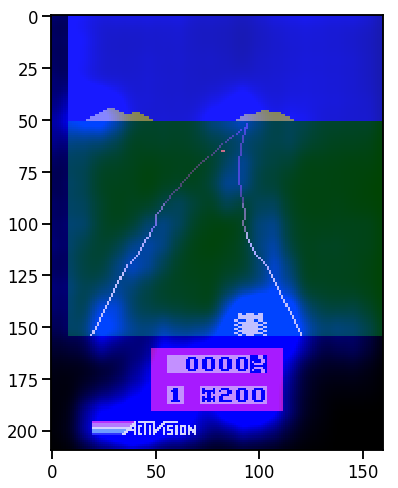

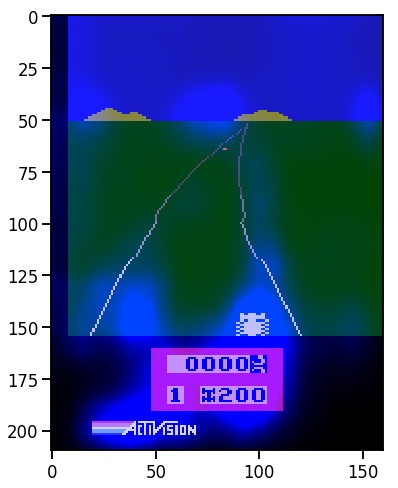

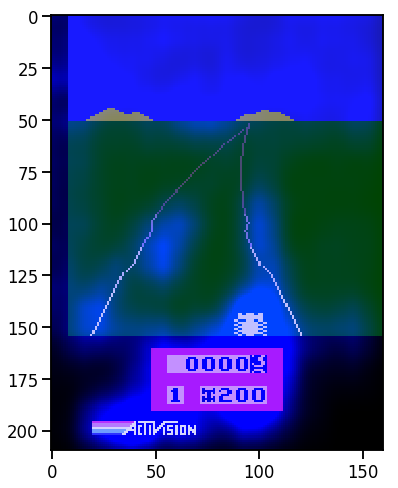

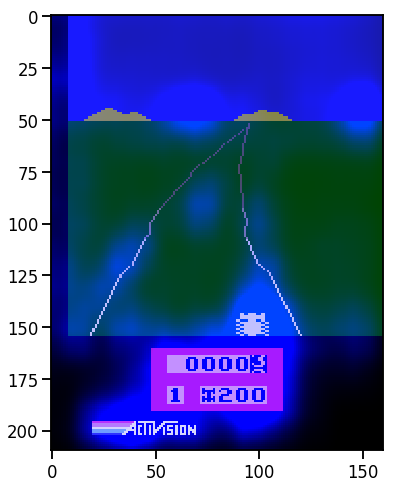

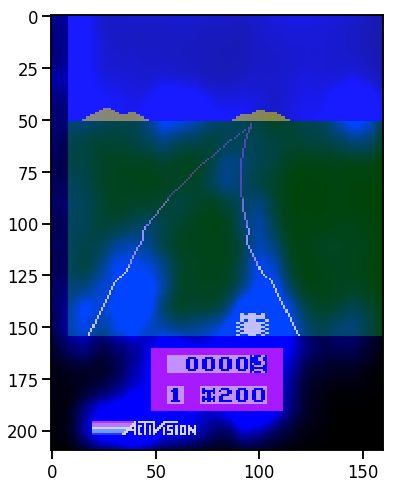

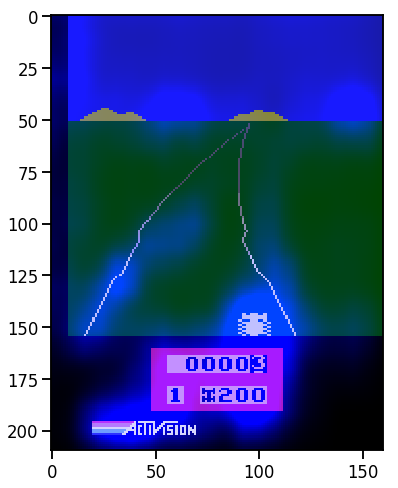

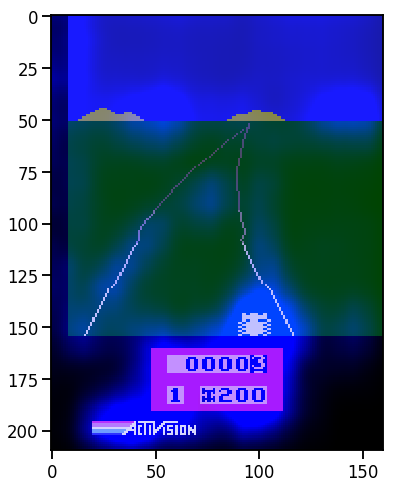

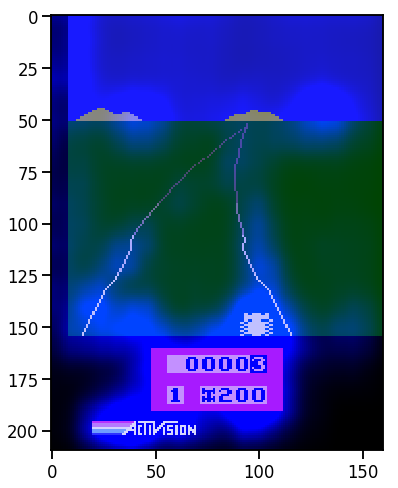

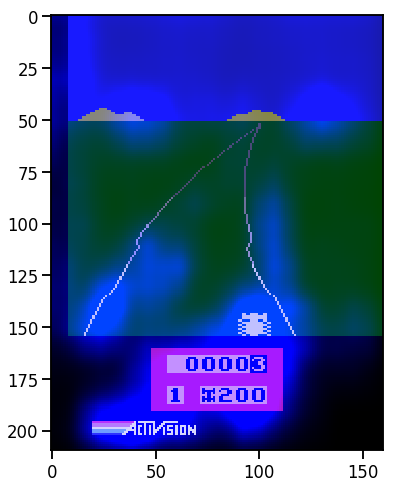

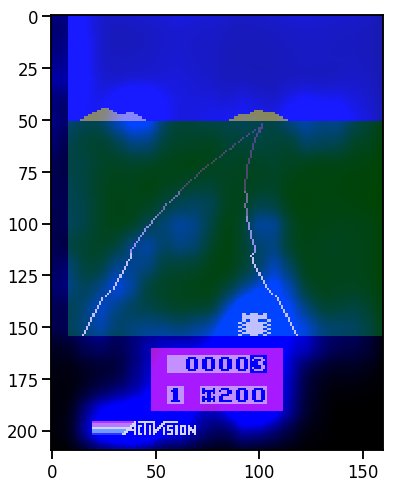

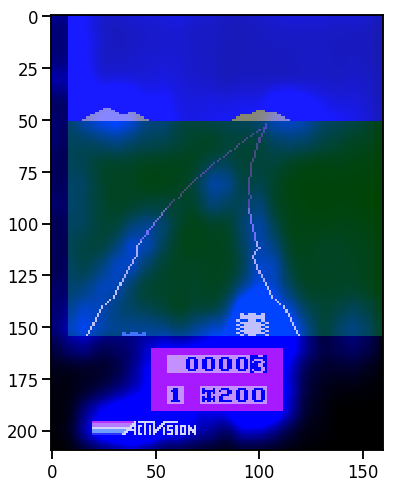

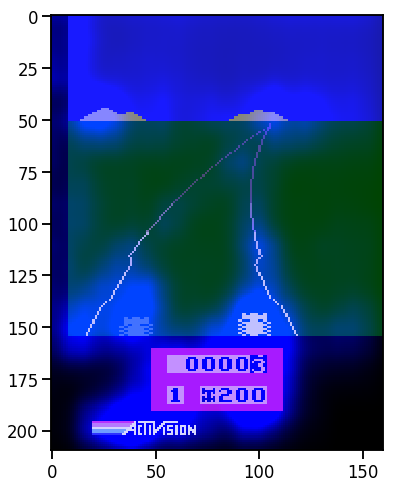

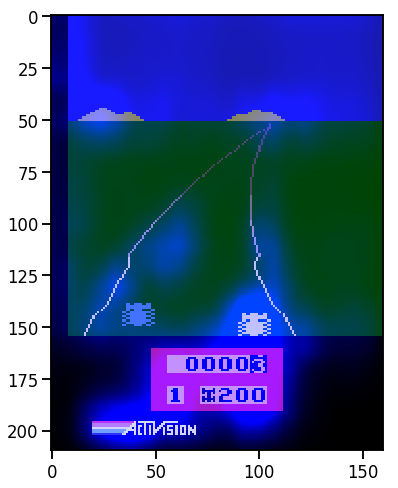

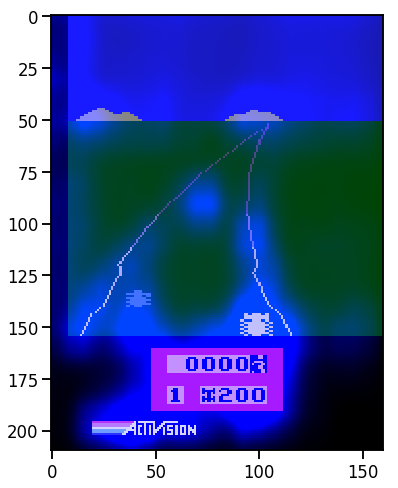

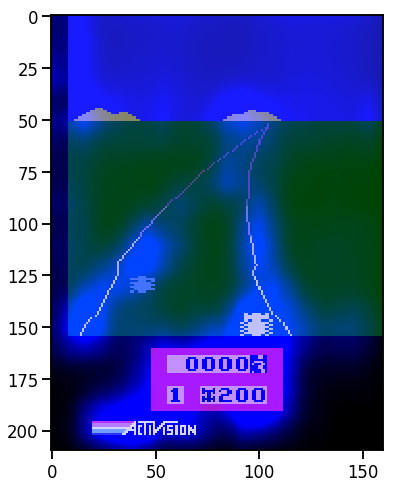

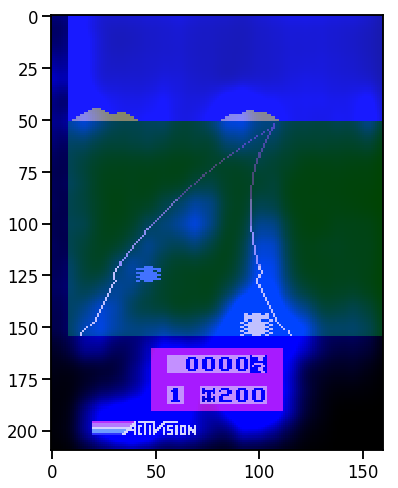

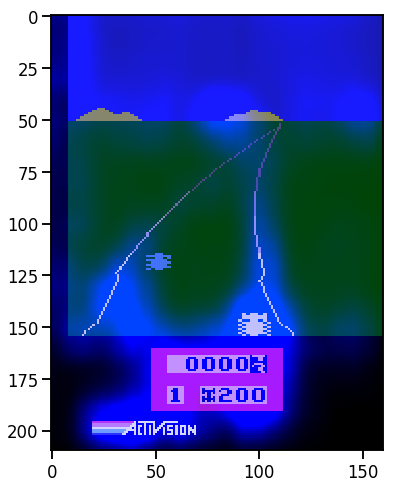

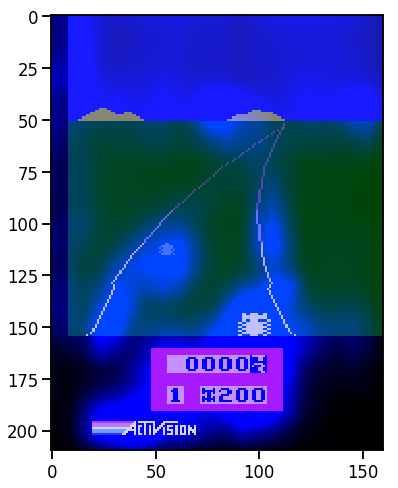

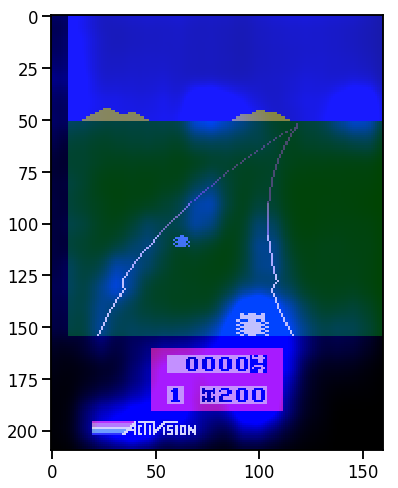

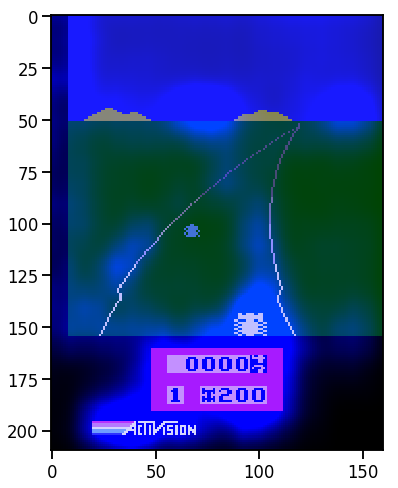

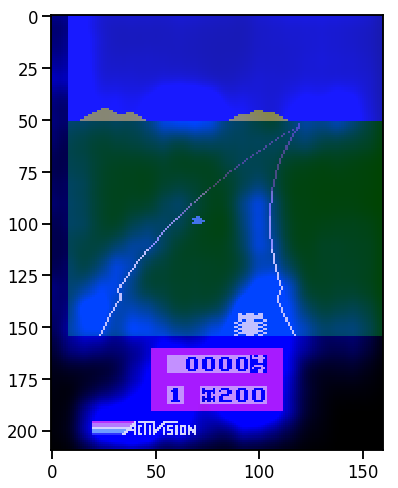

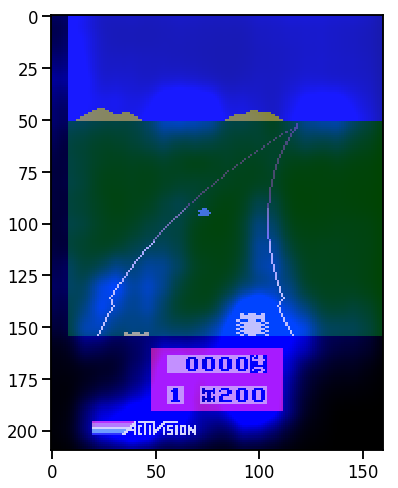

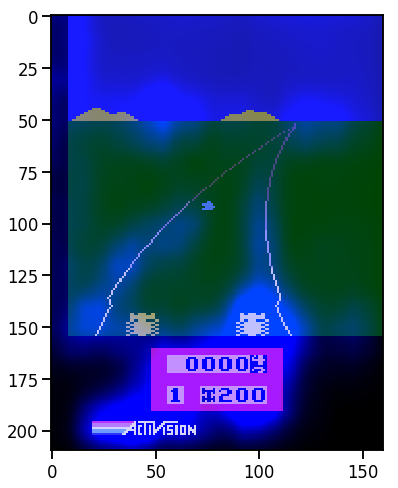

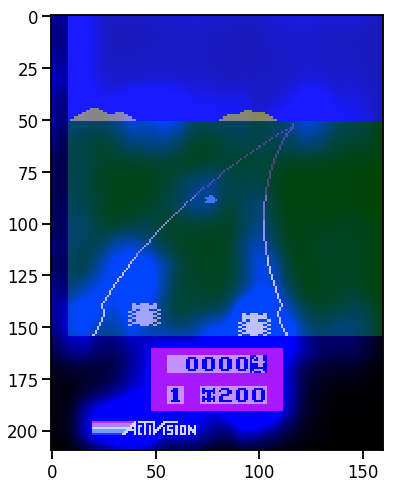

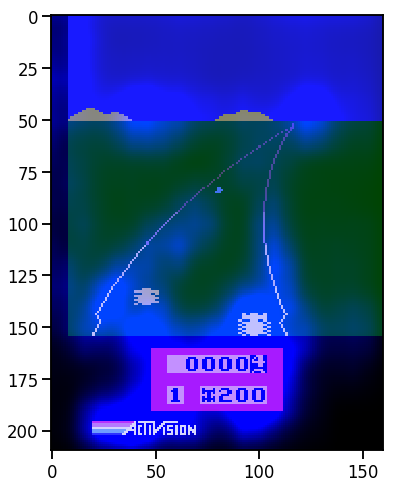

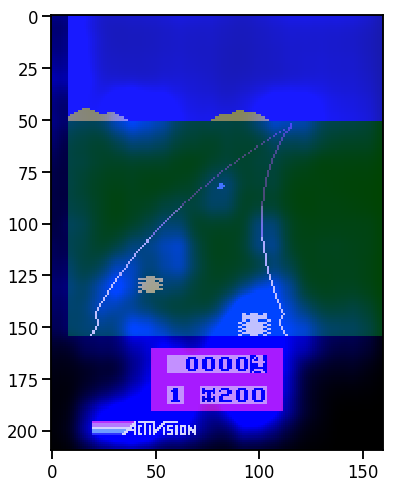

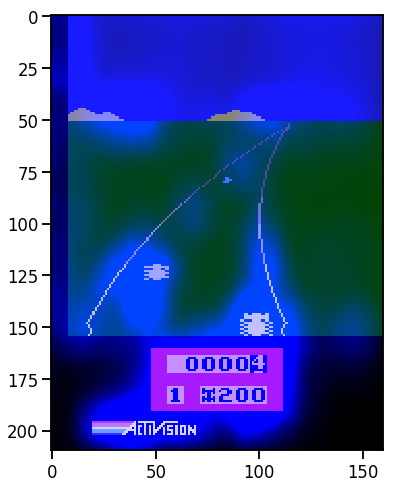

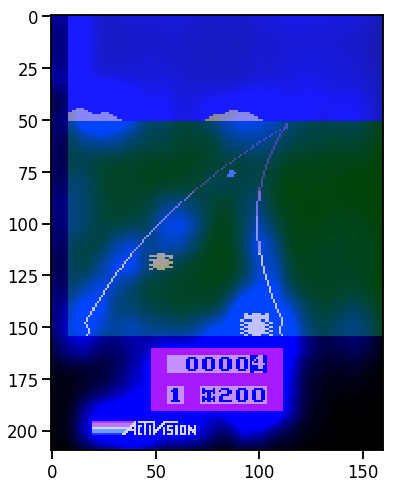

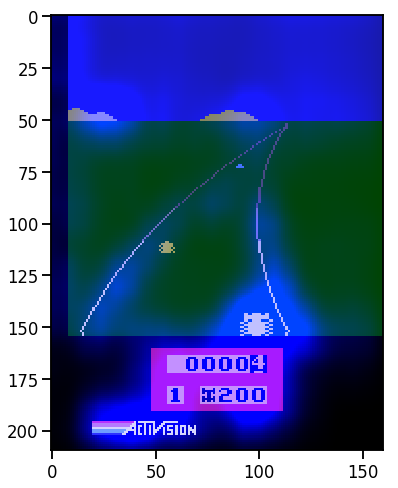

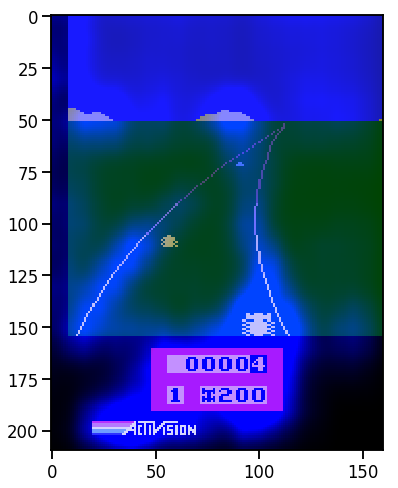

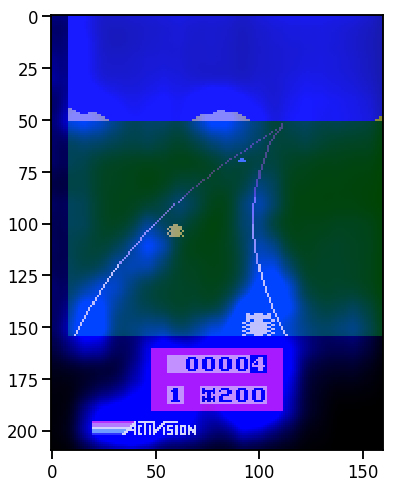

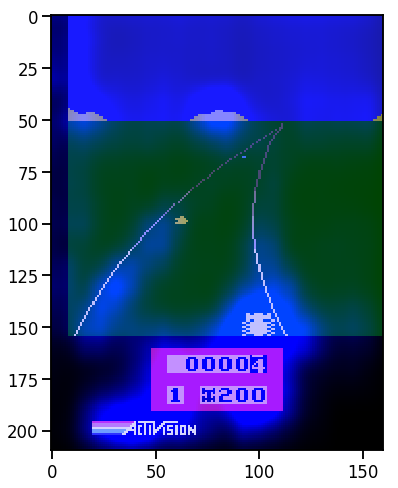

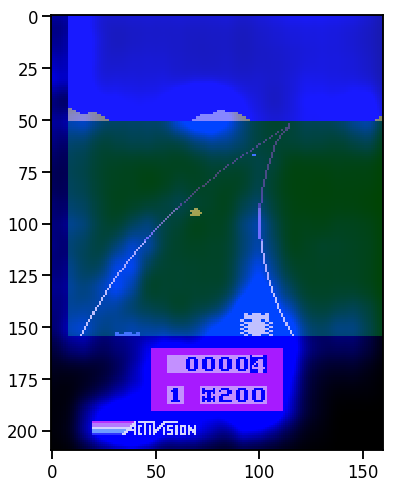

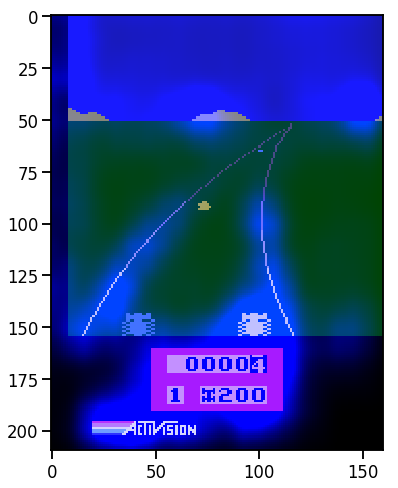

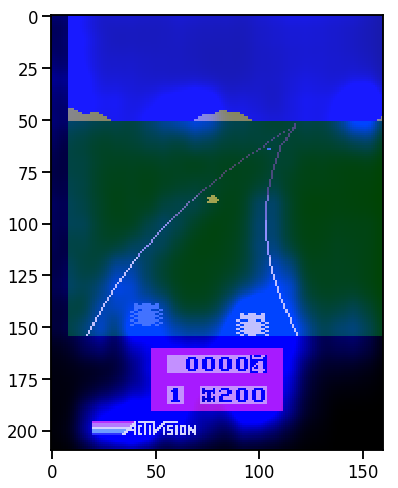

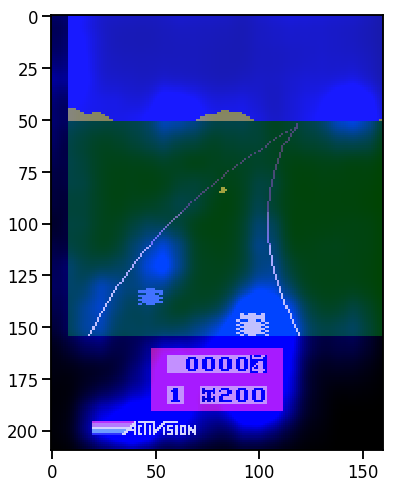

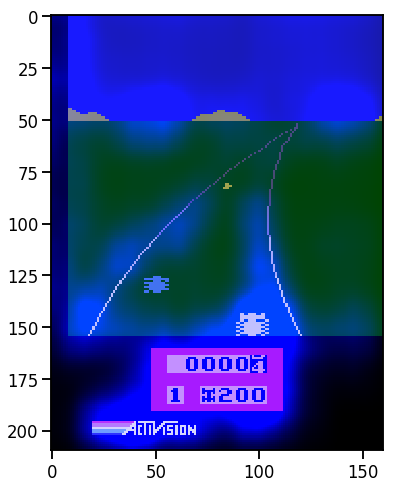

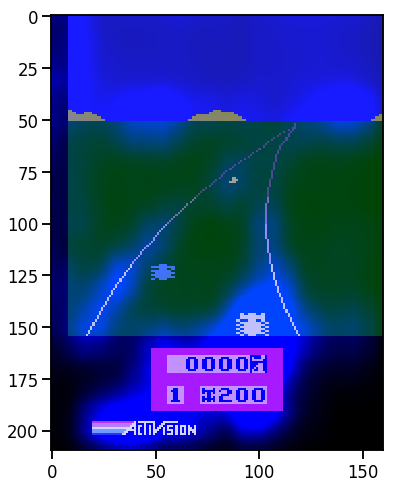

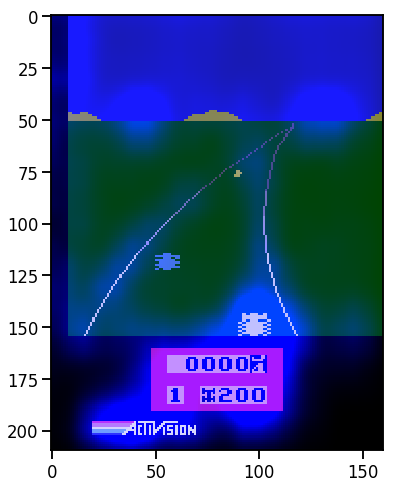

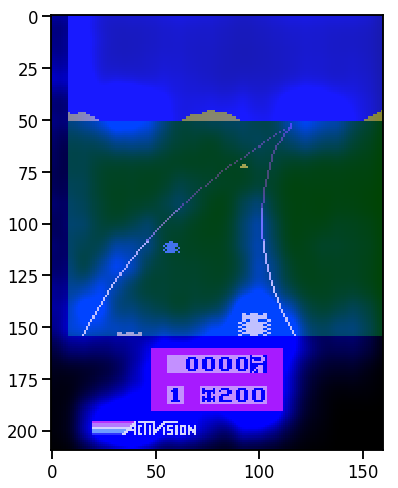

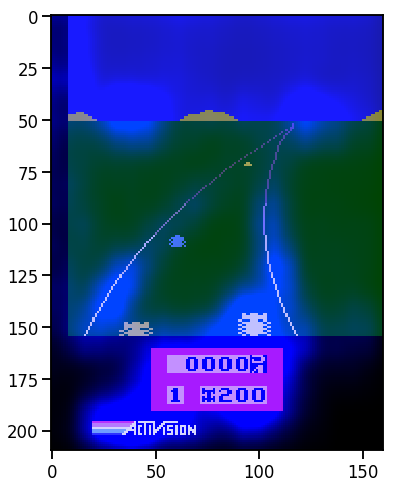

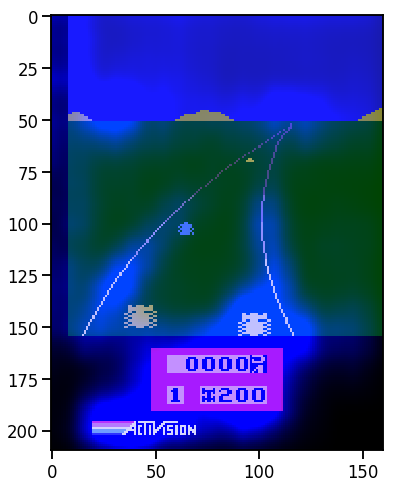

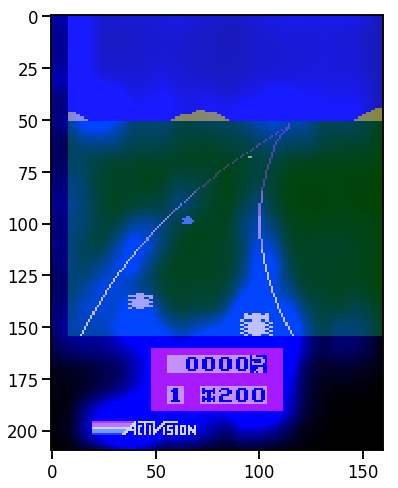

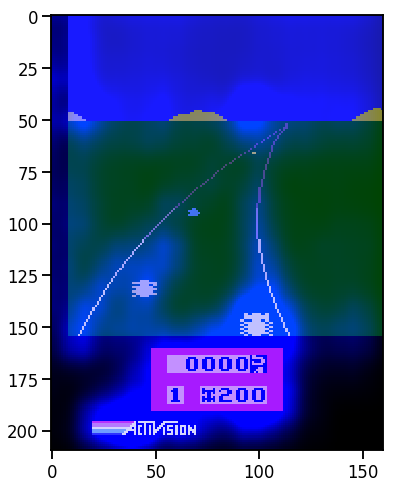

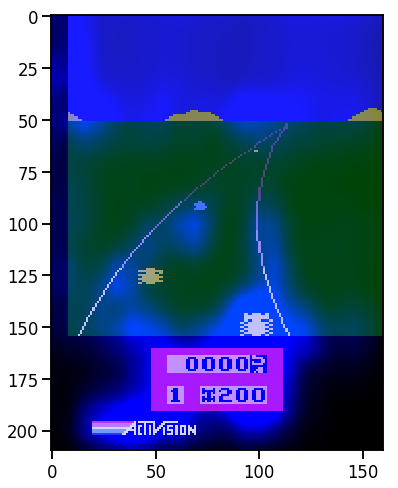

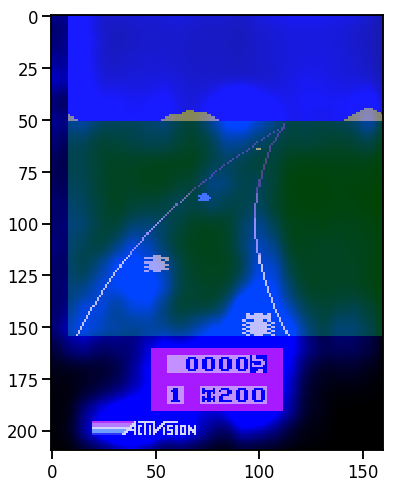

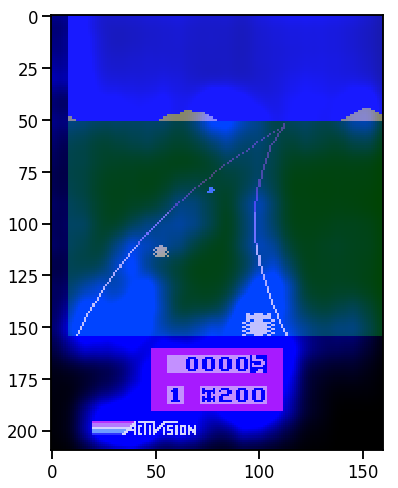

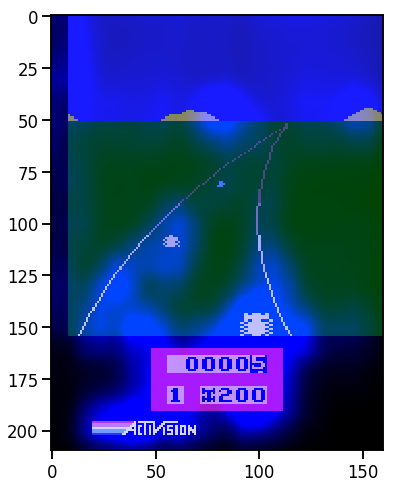

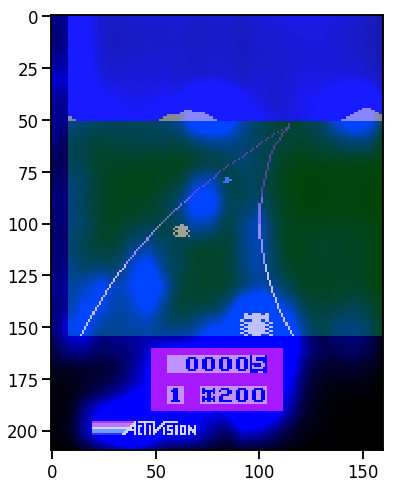

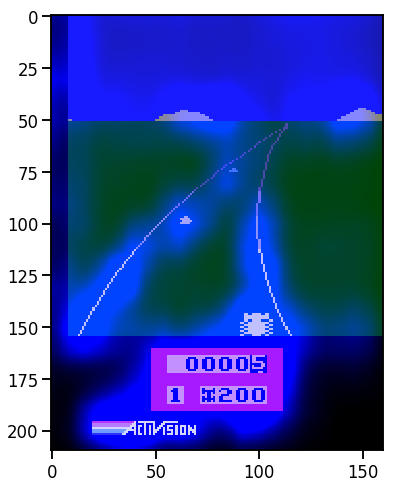

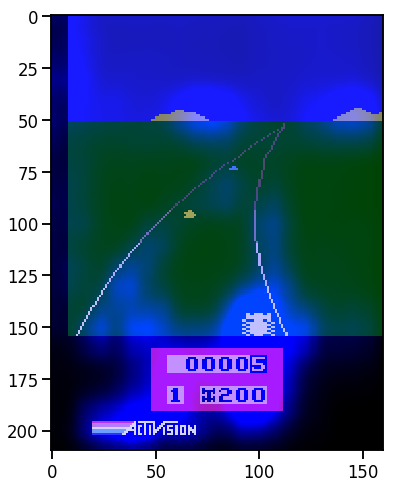

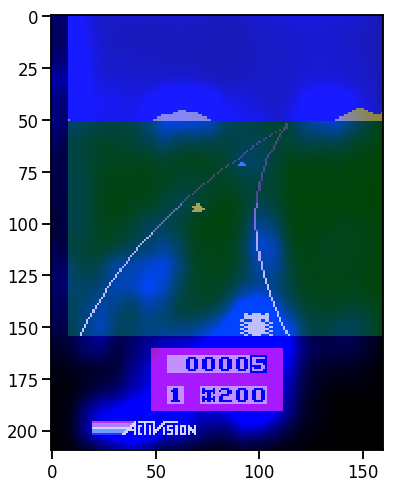

In [23]:
for heatmap in recorder.saliencies:
    plt.figure(figsize=(heatmap.shape[0]/20, heatmap.shape[1]/20))
    plt.imshow(heatmap)
    plt.show()

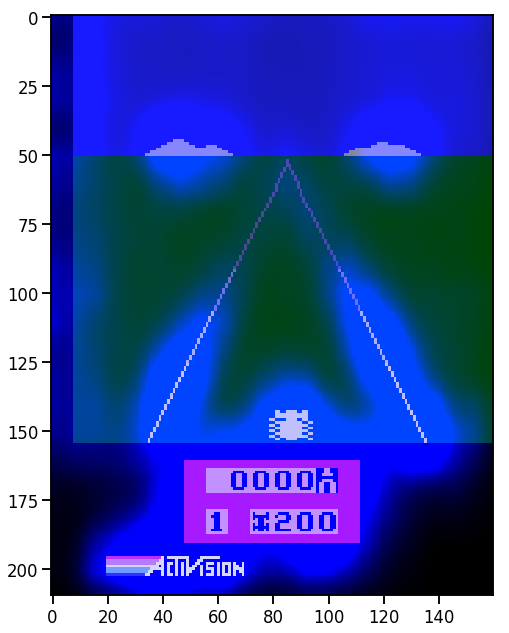

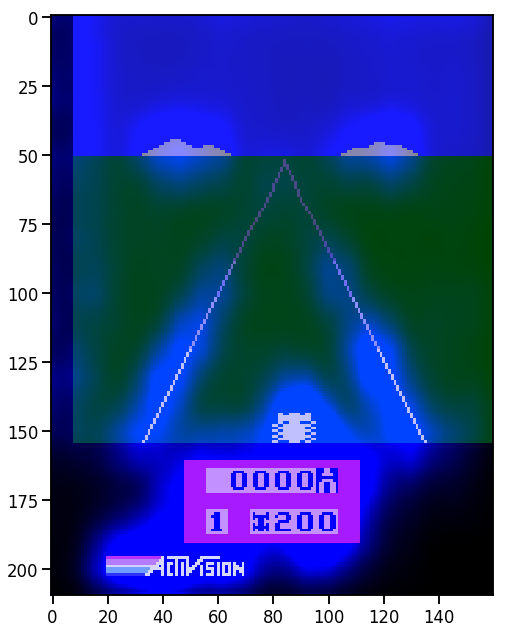

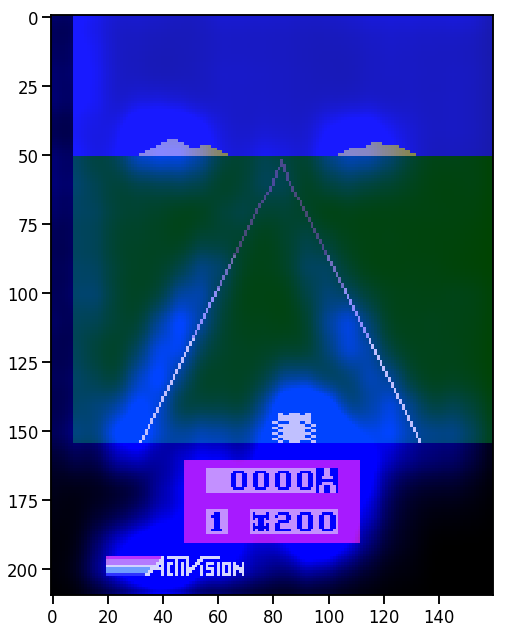

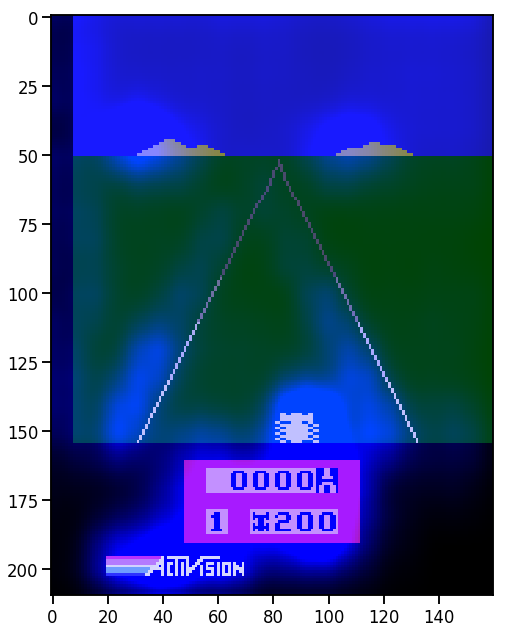

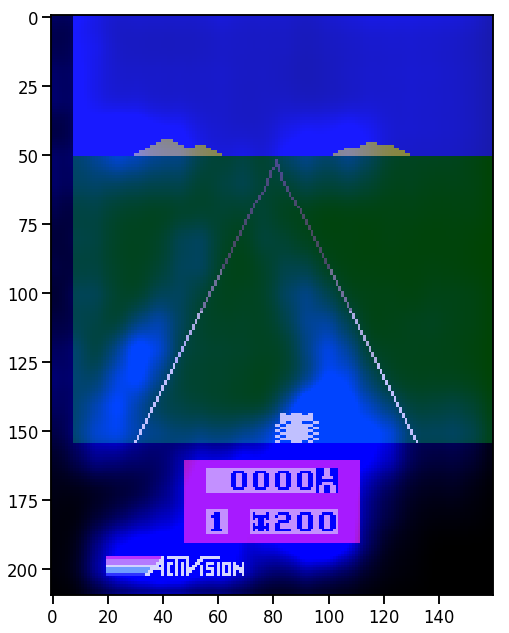

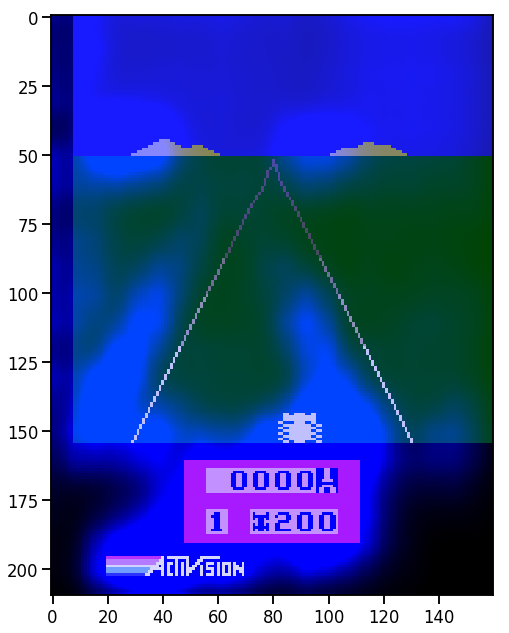

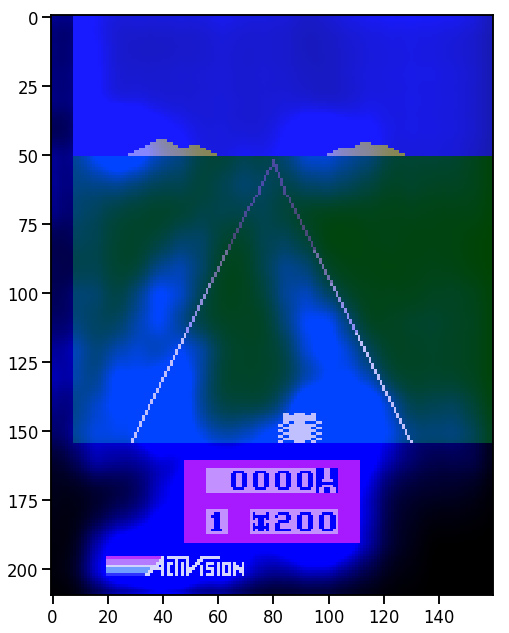

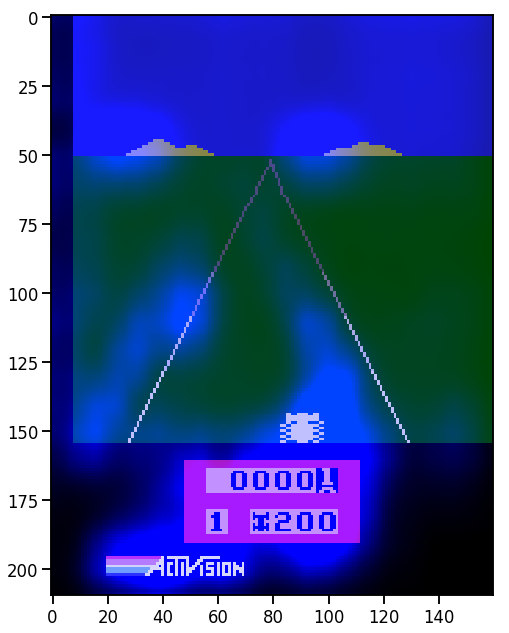

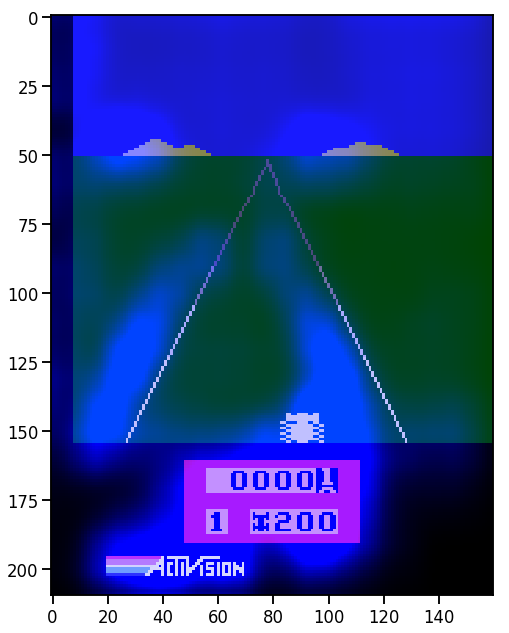

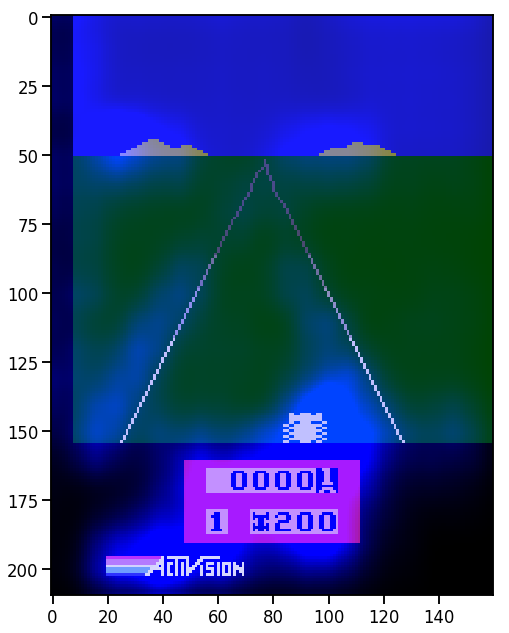

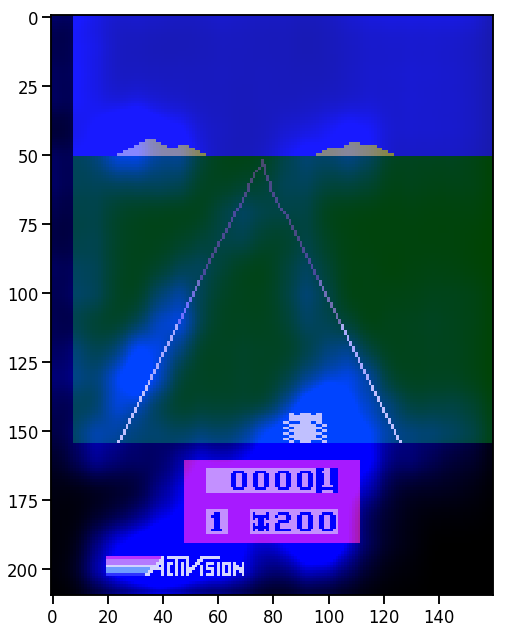

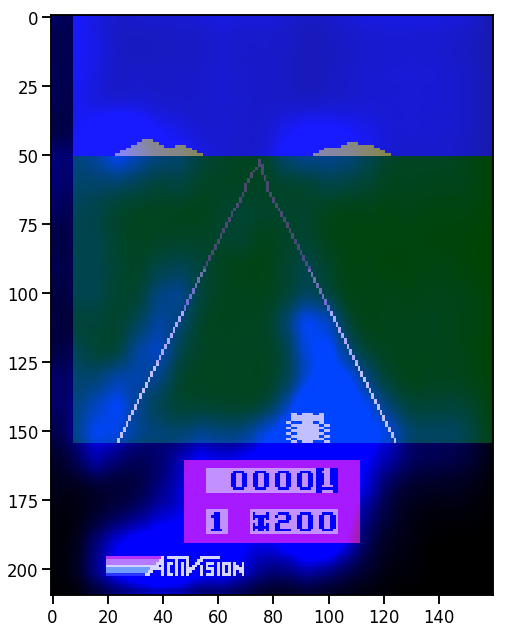

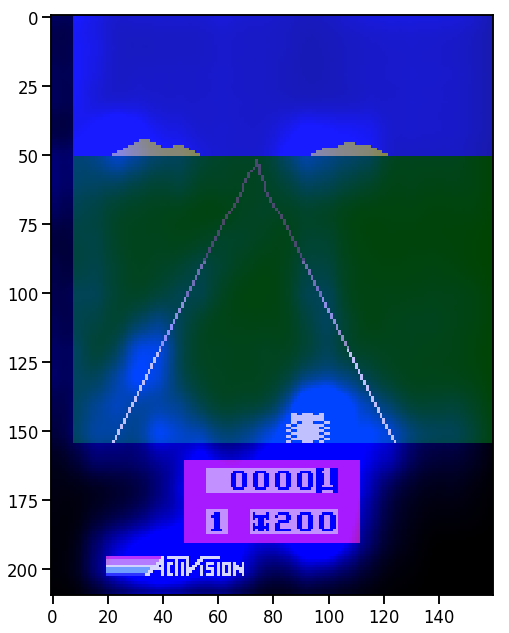

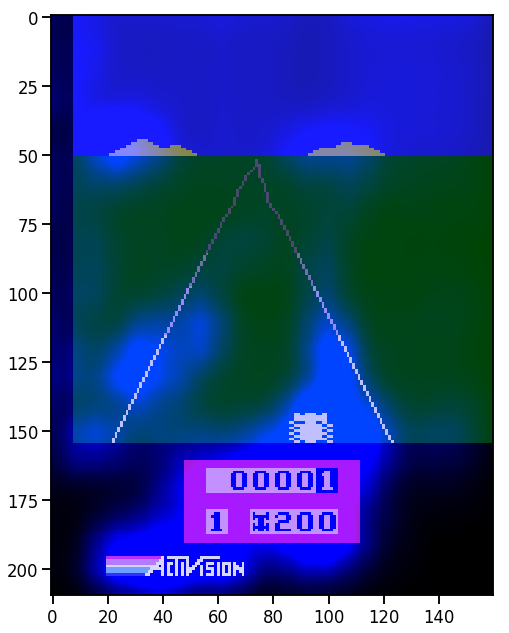

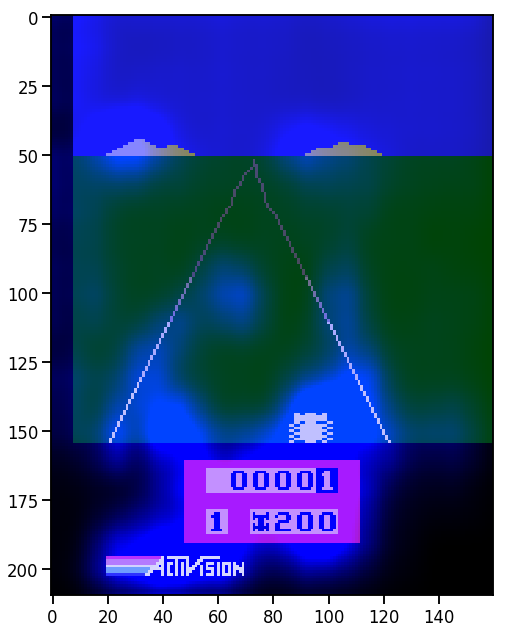

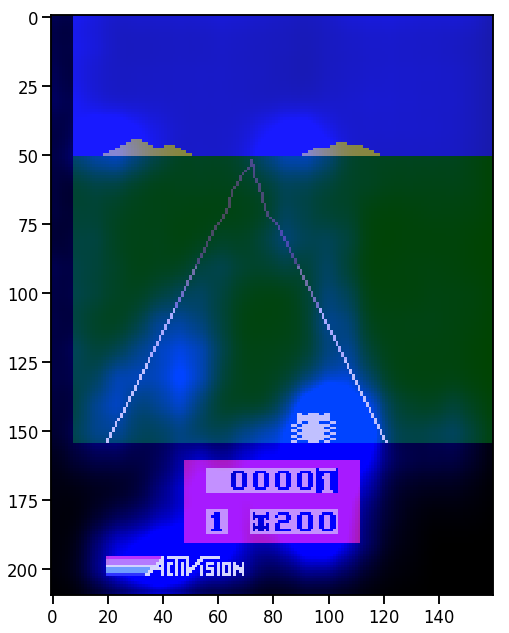

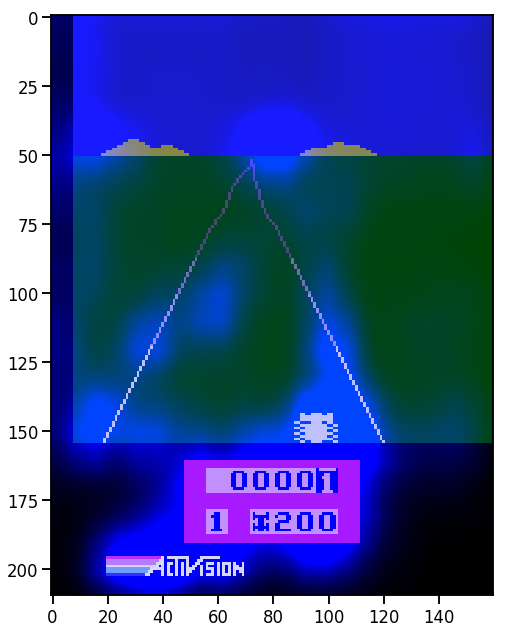

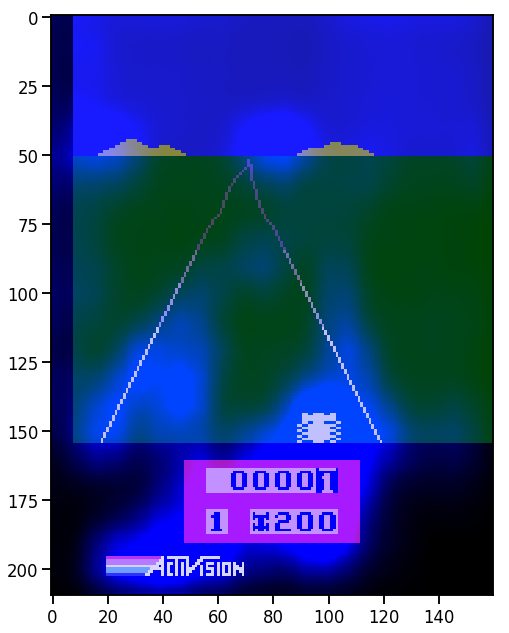

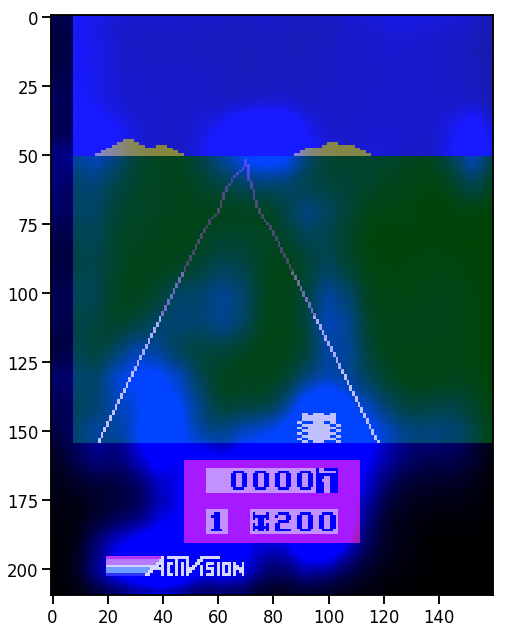

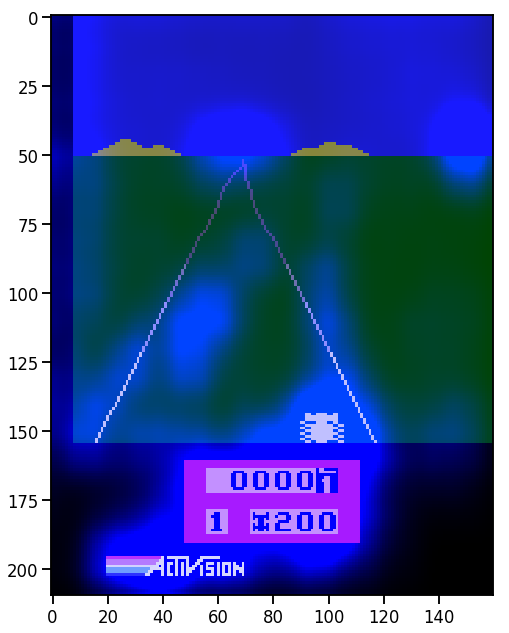

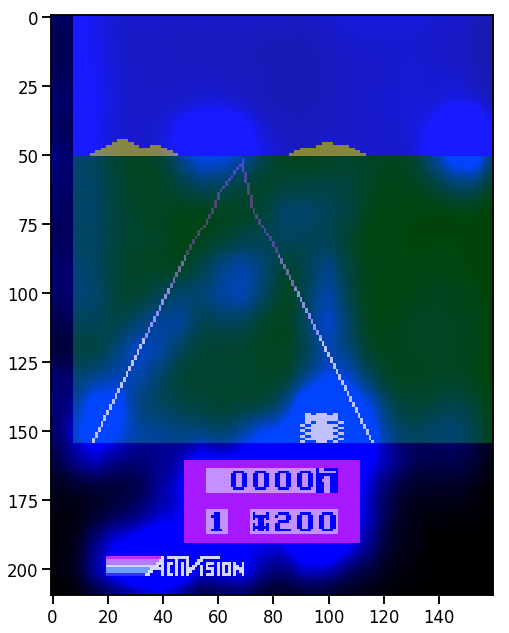

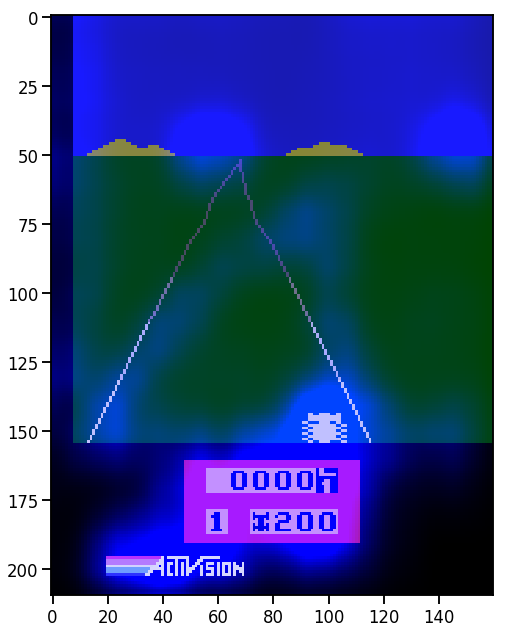

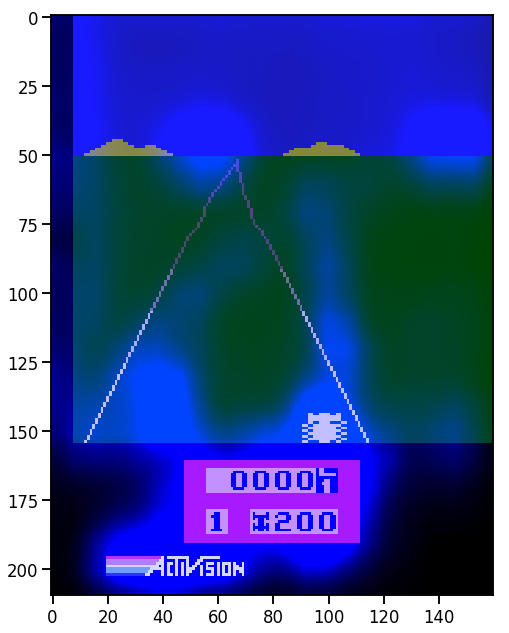

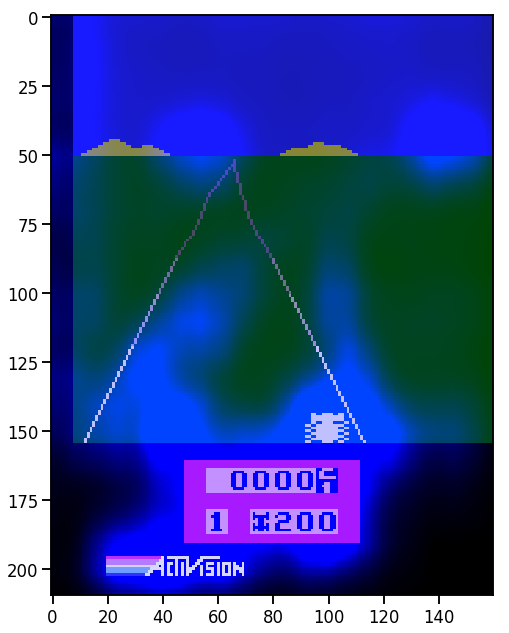

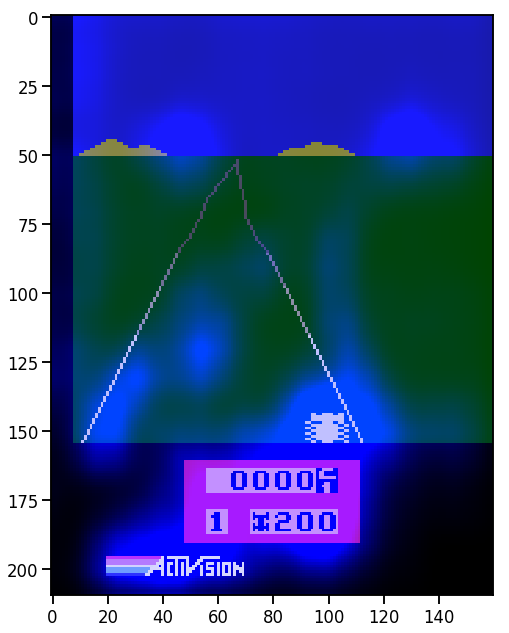

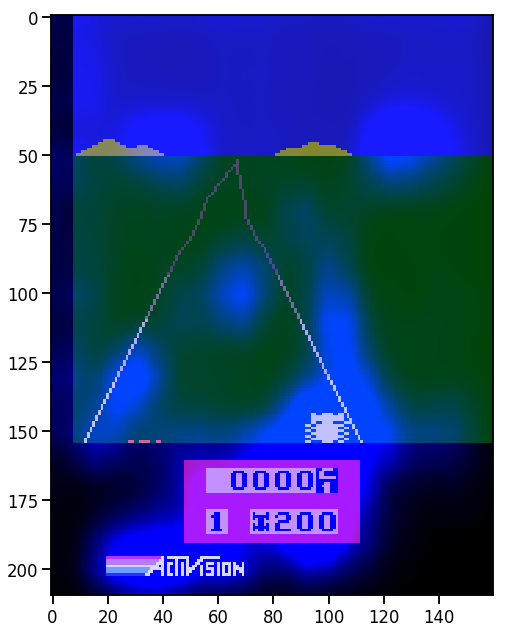

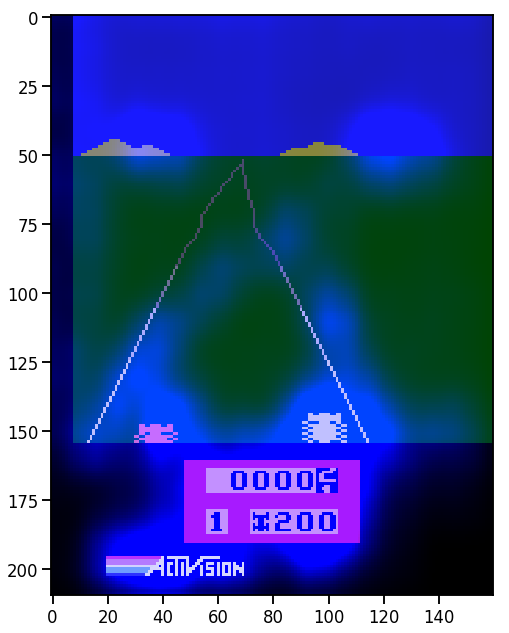

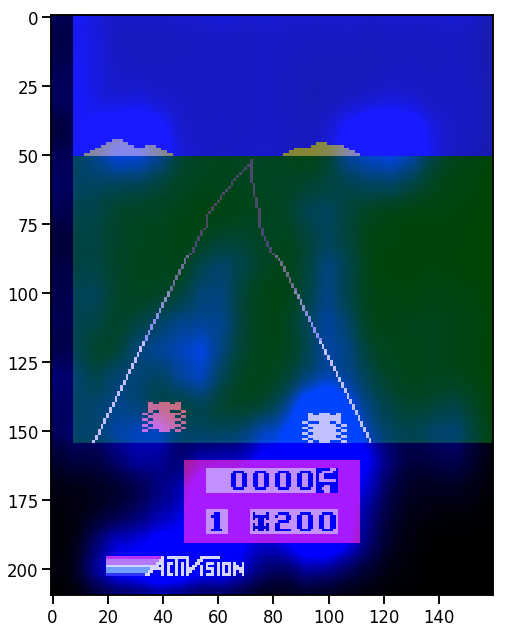

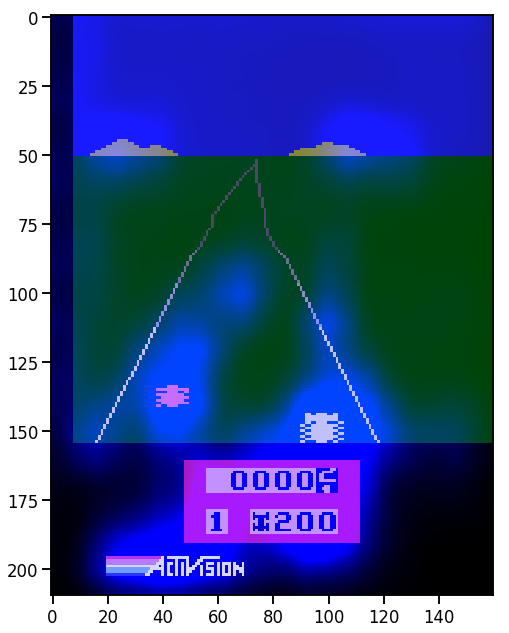

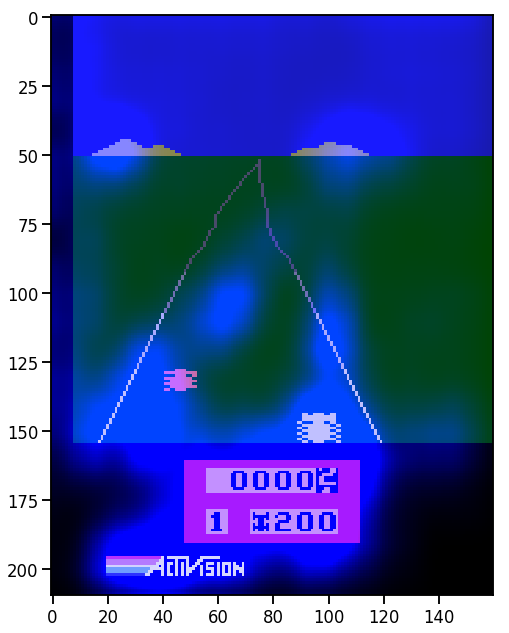

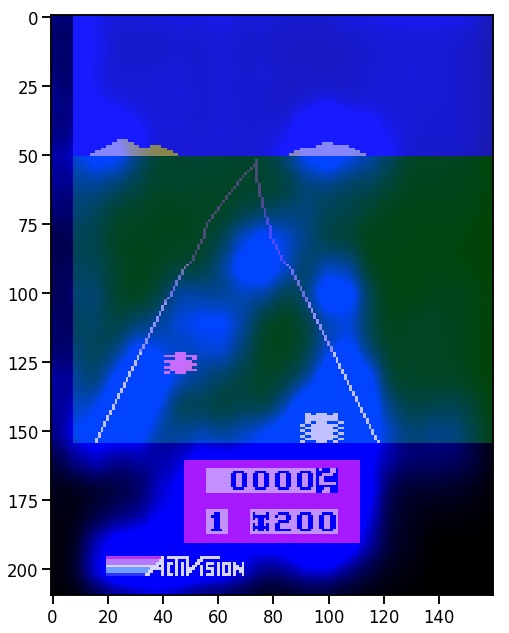

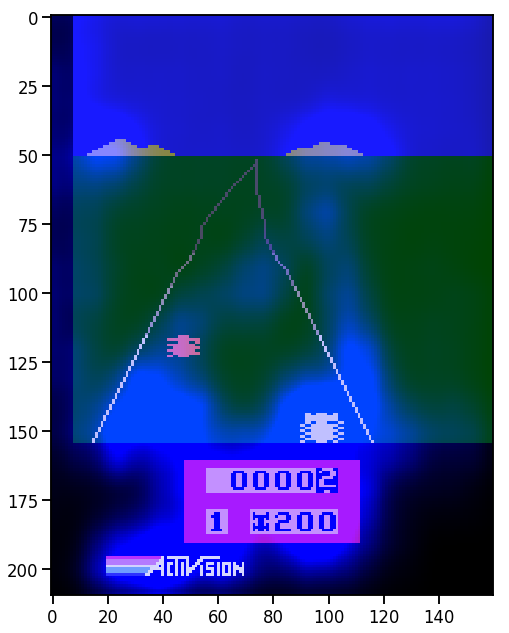

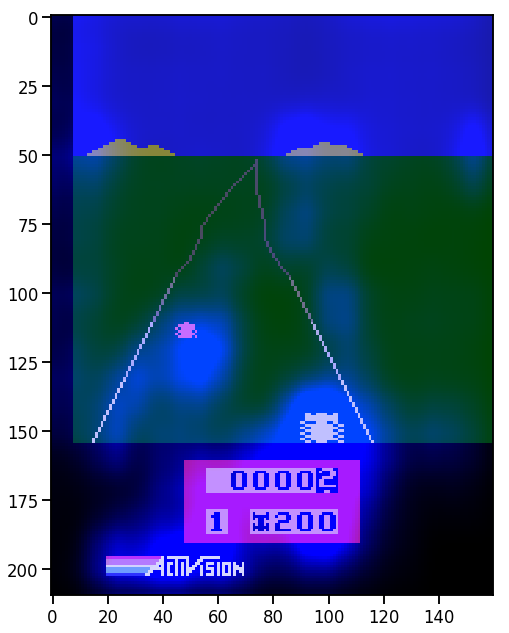

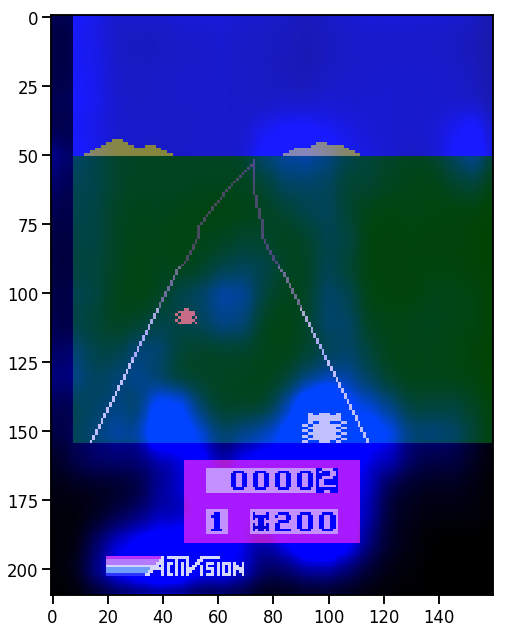

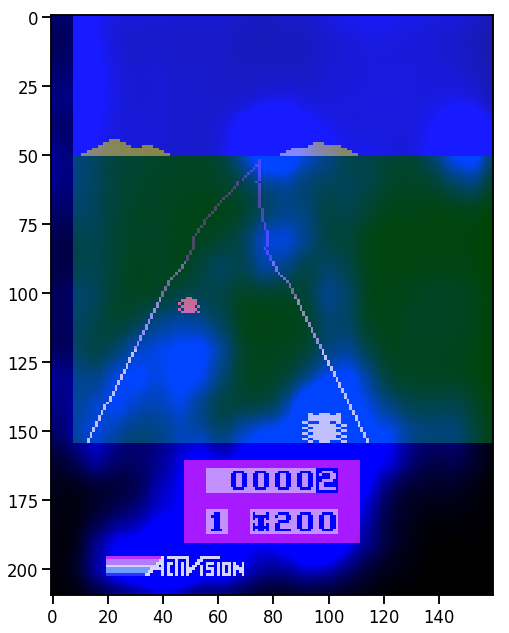

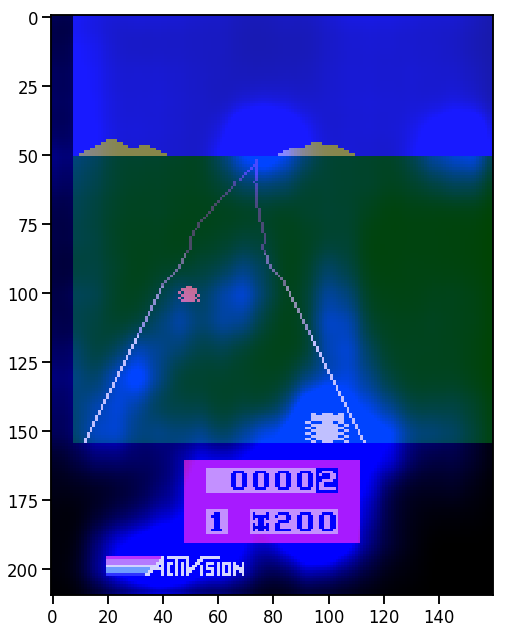

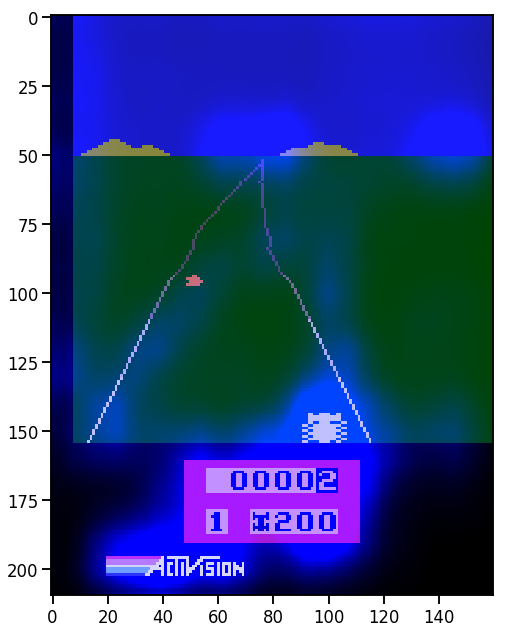

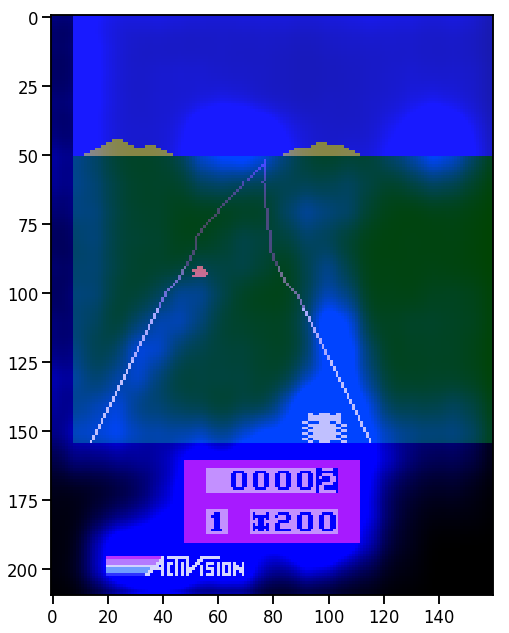

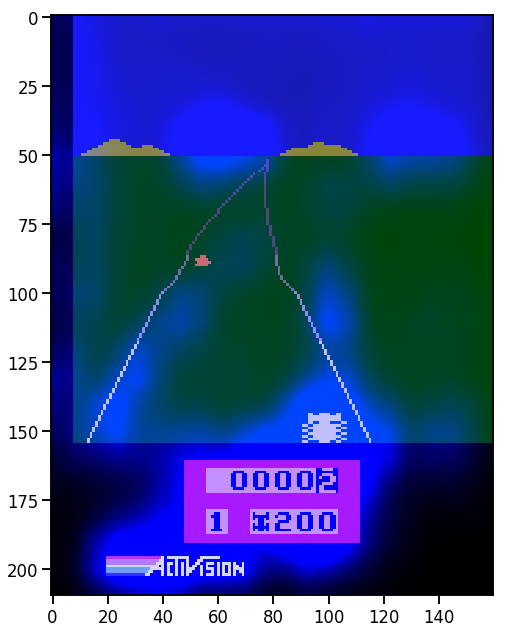

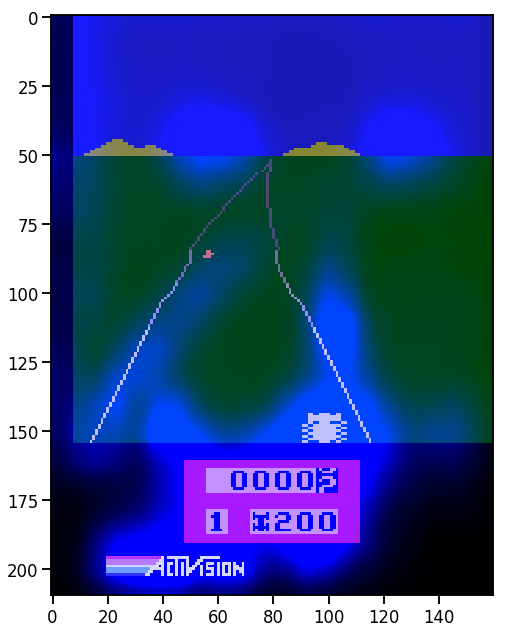

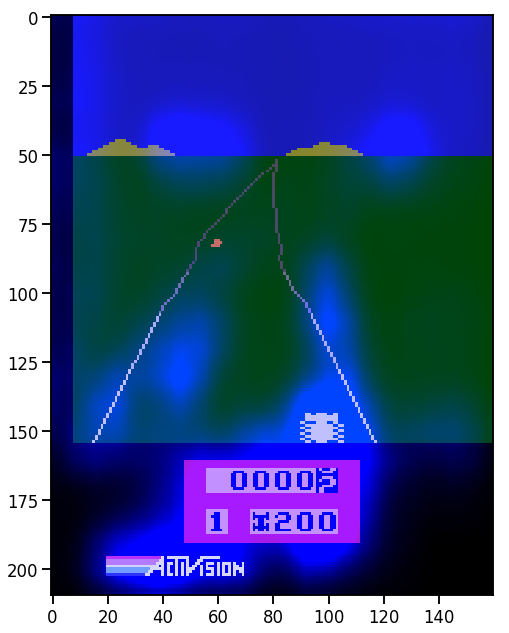

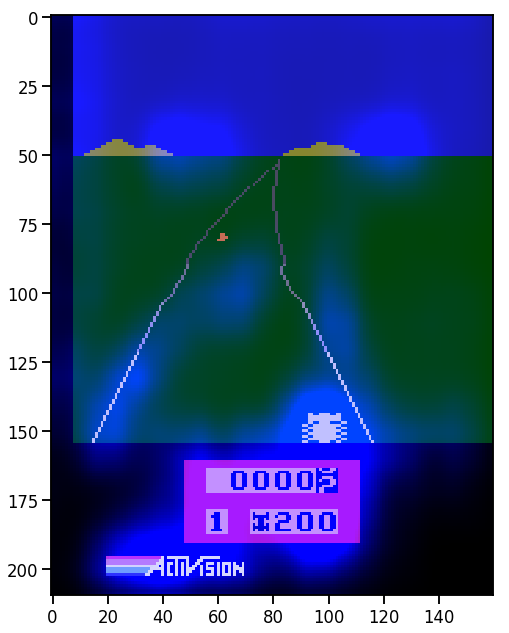

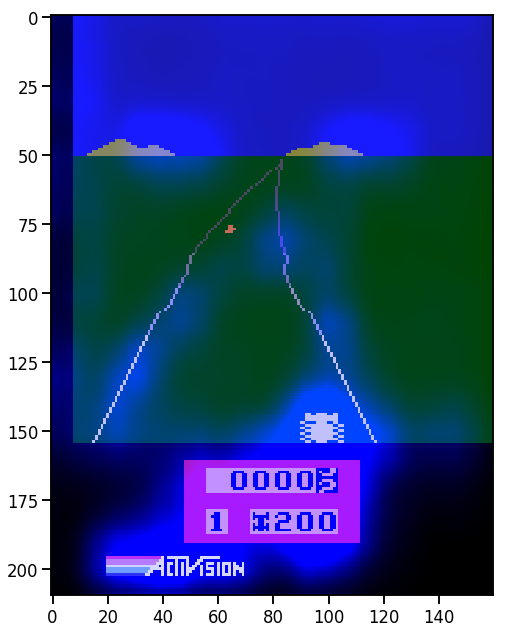

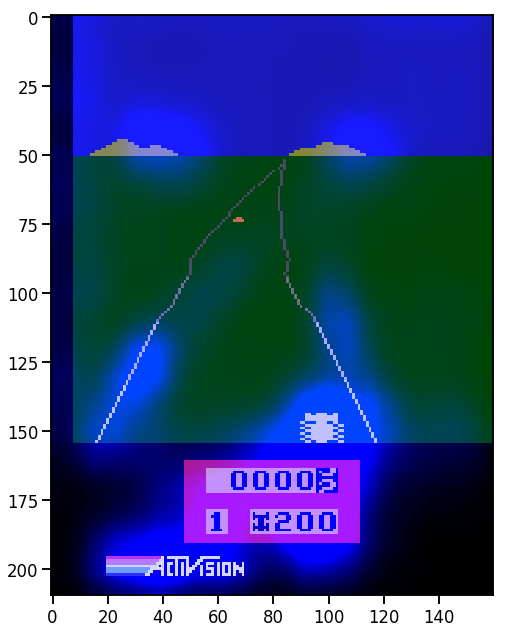

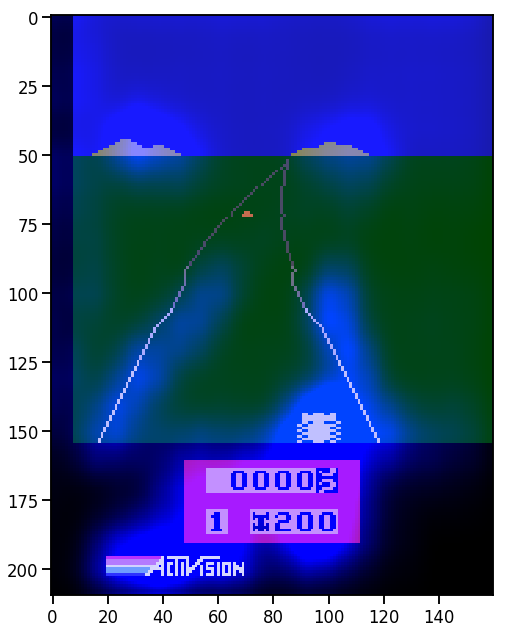

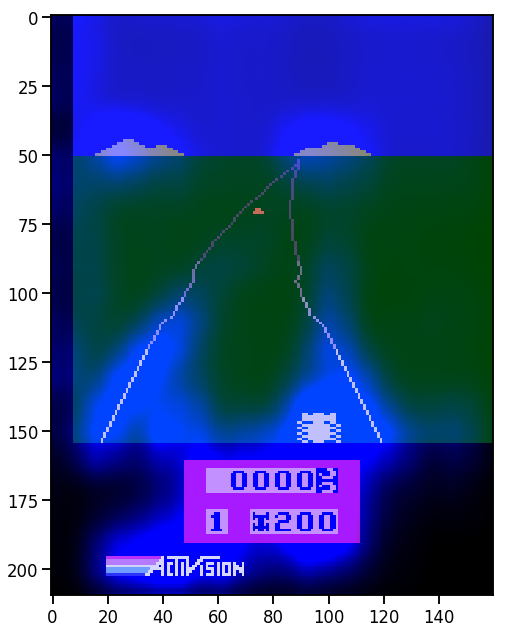

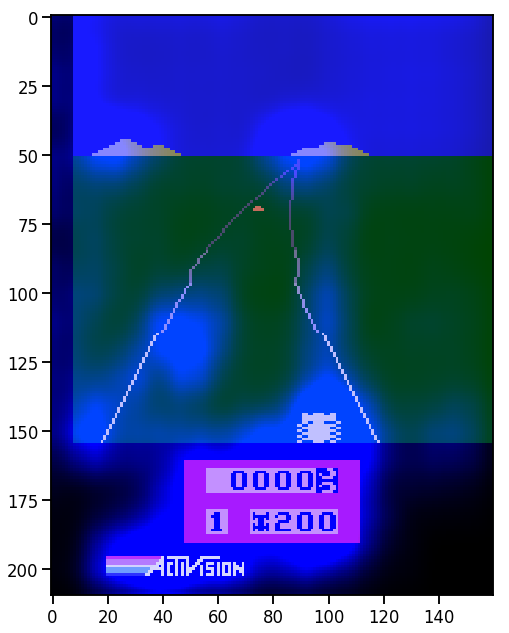

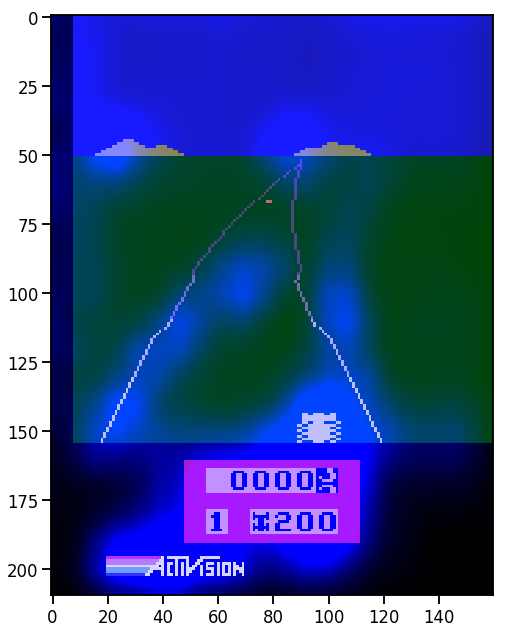

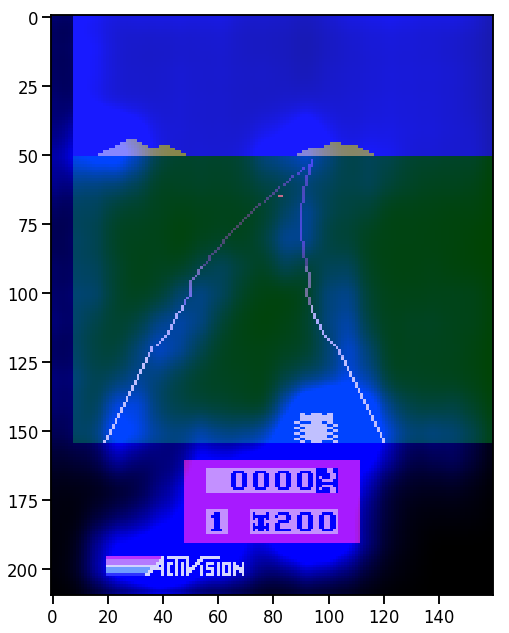

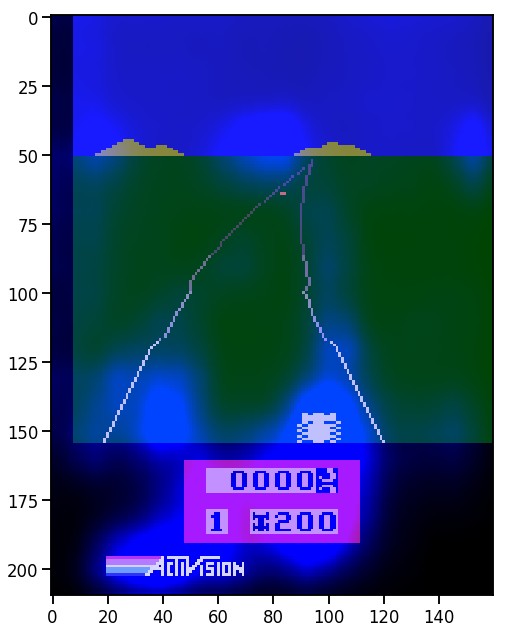

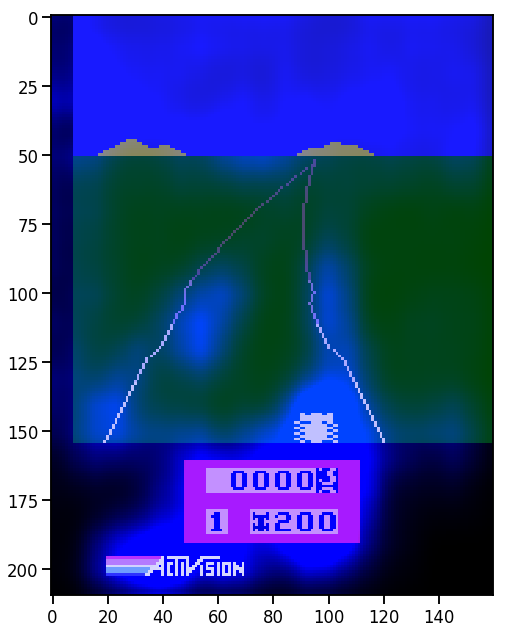

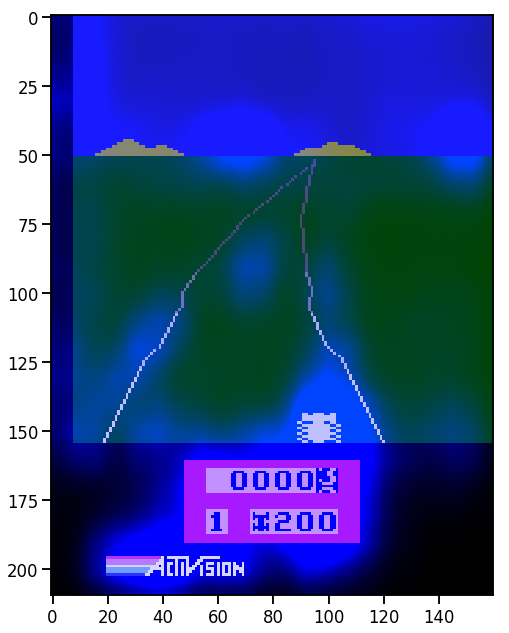

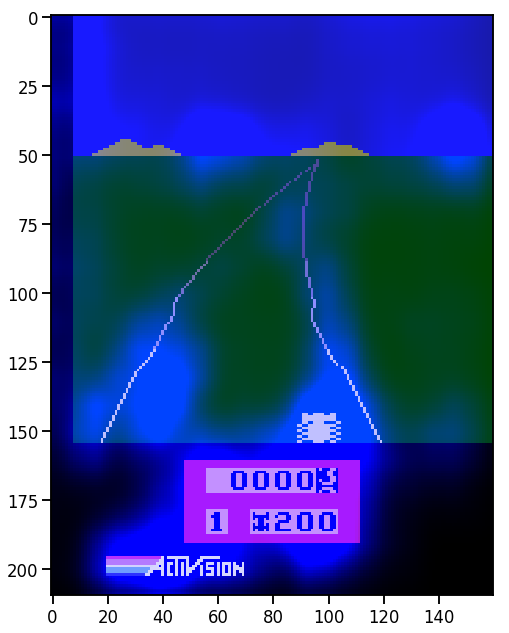

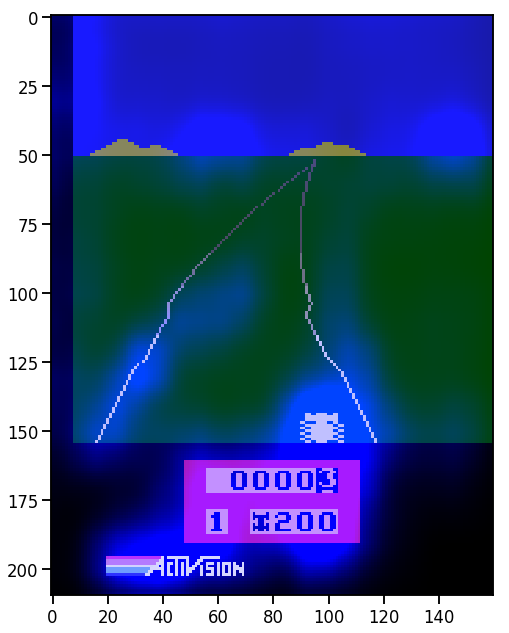

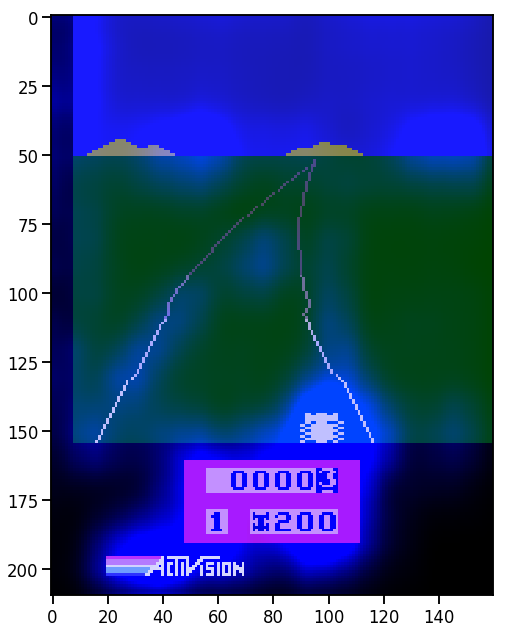

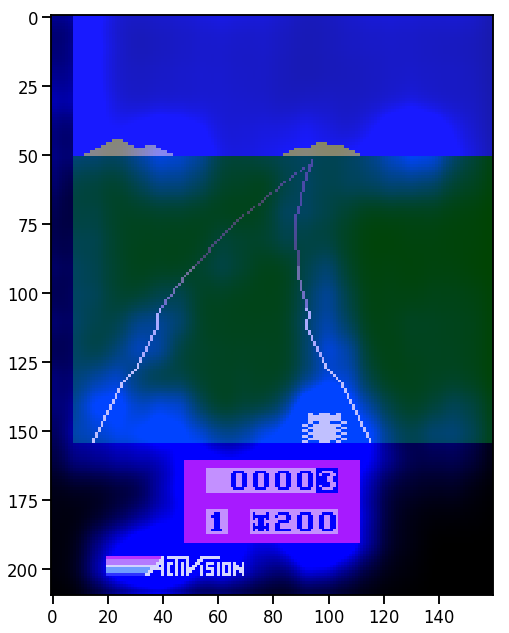

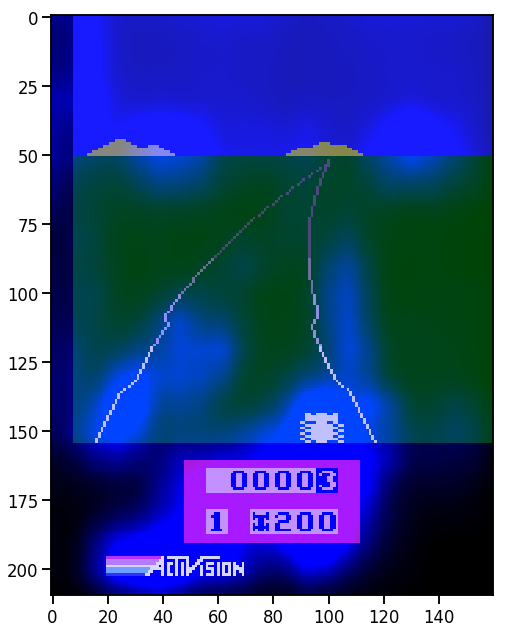

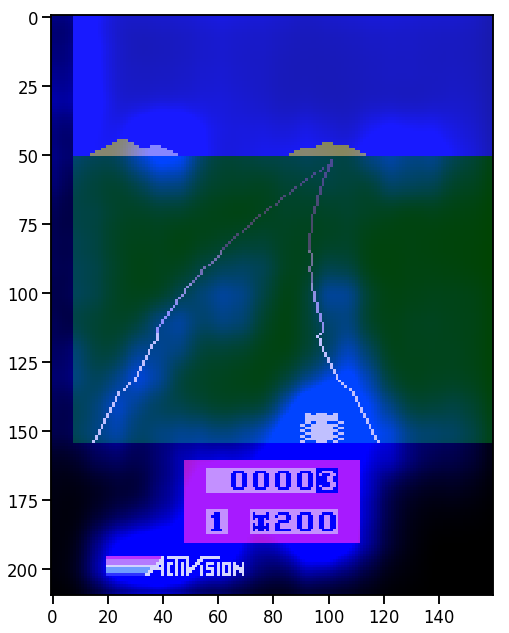

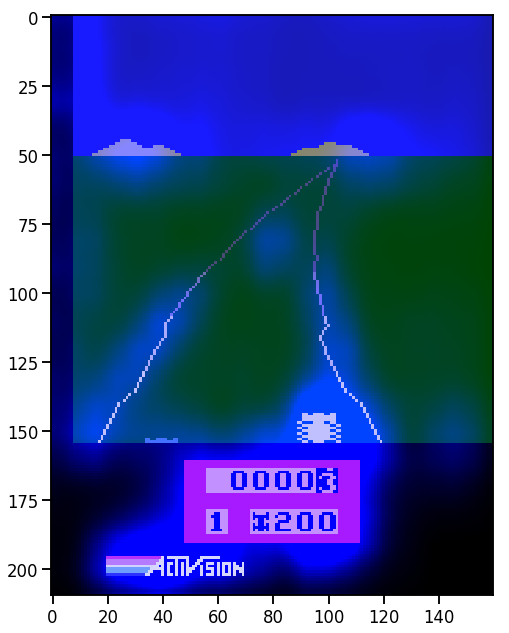

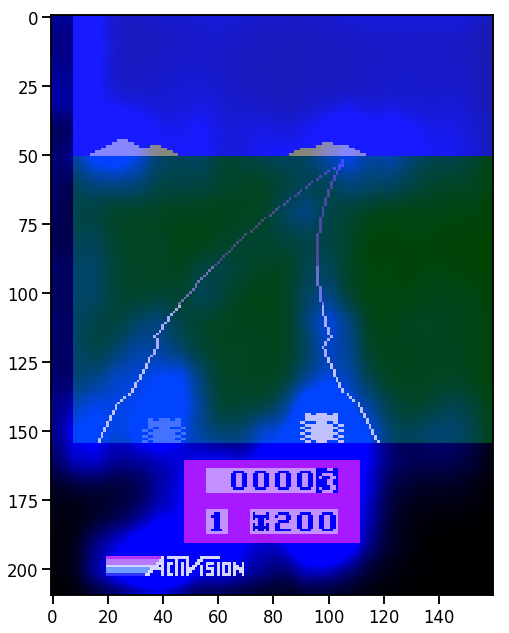

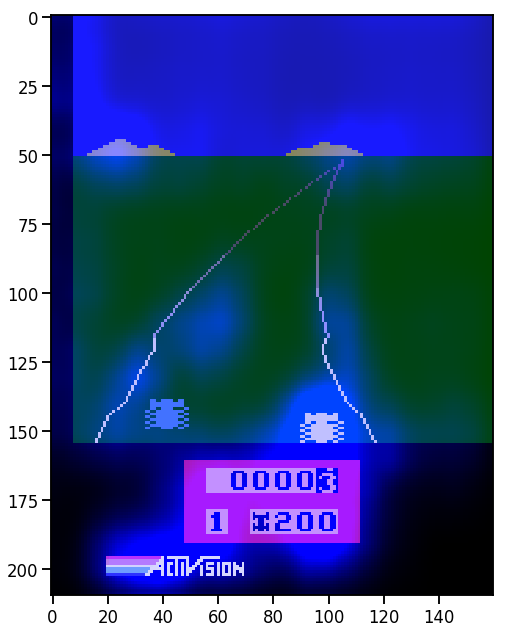

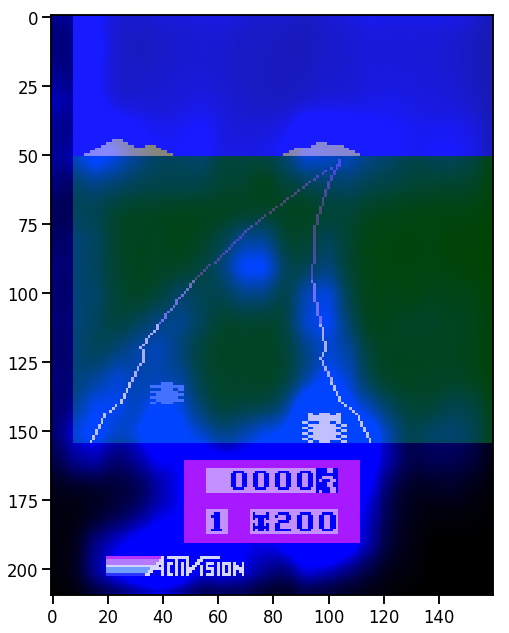

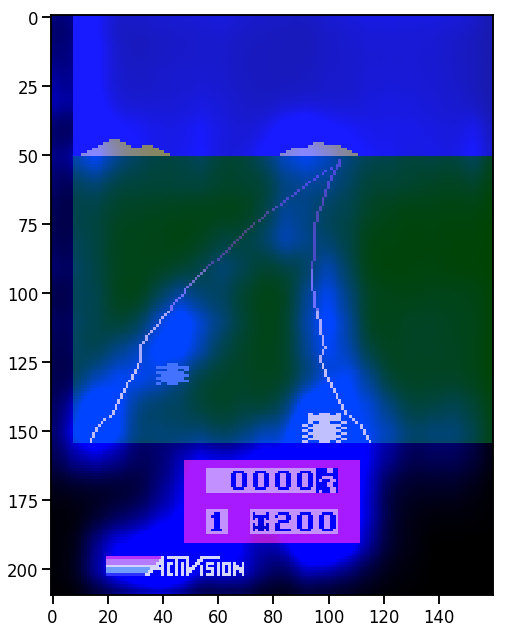

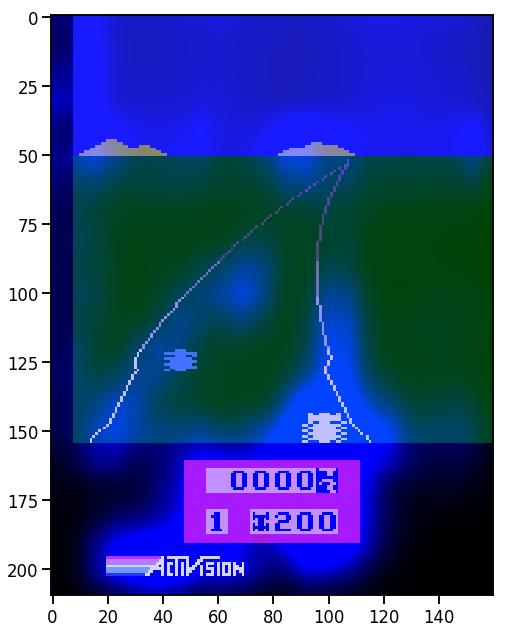

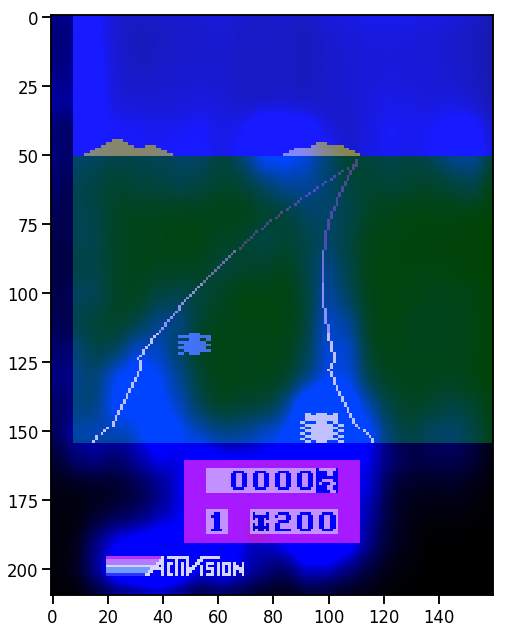

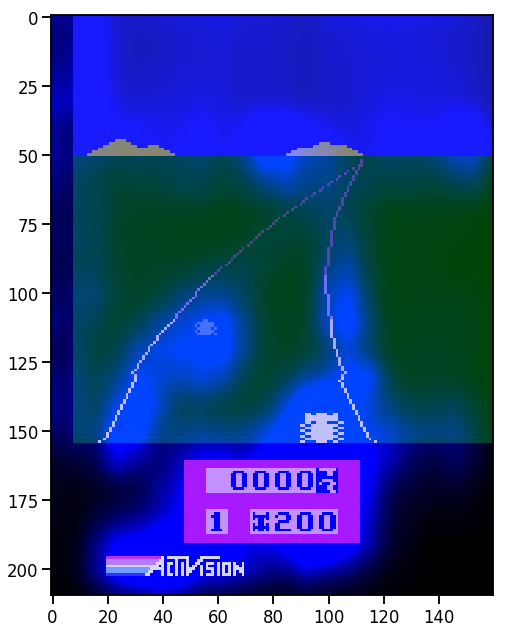

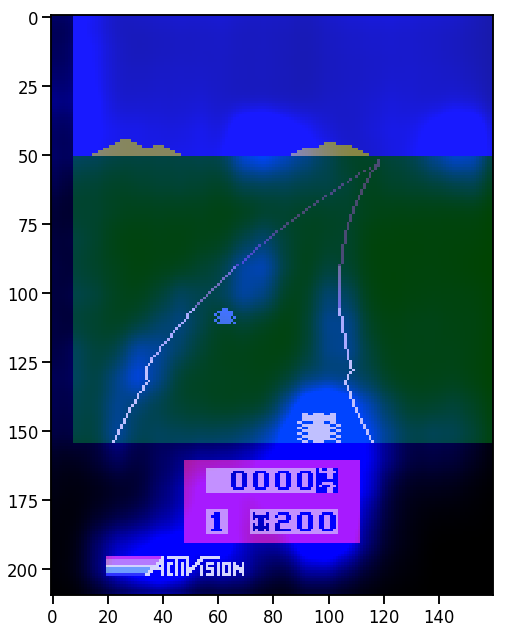

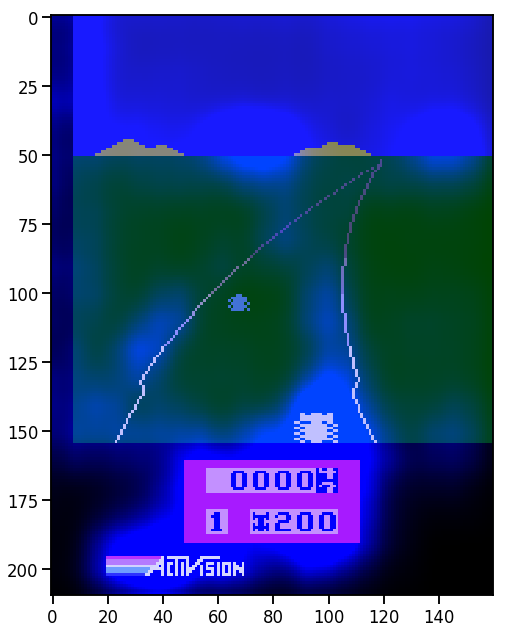

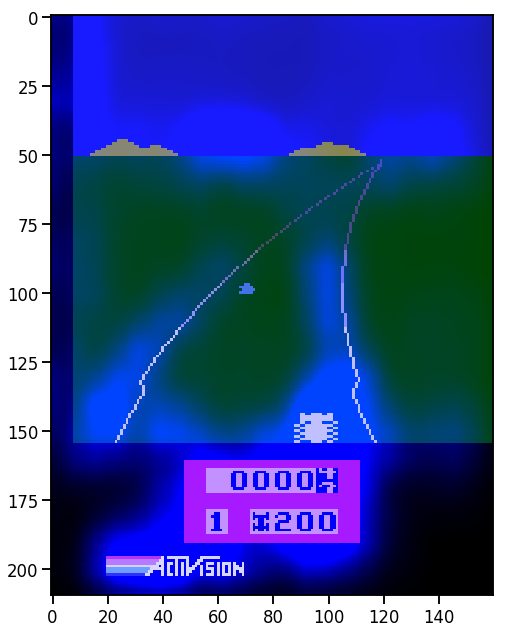

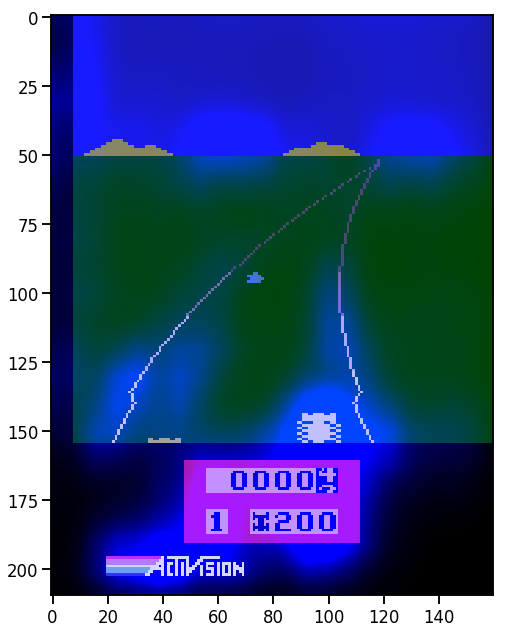

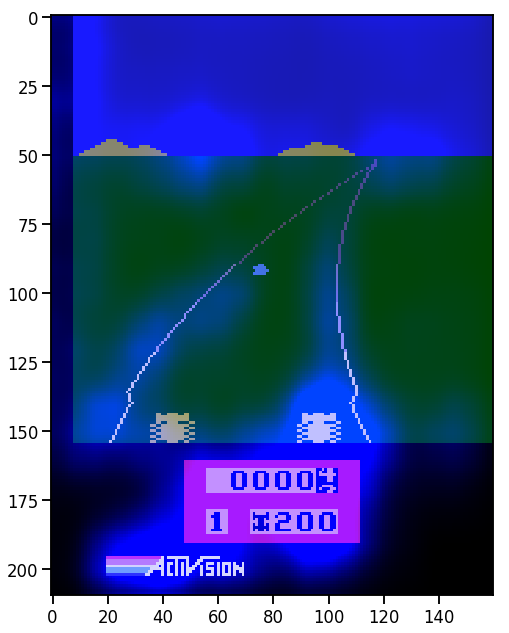

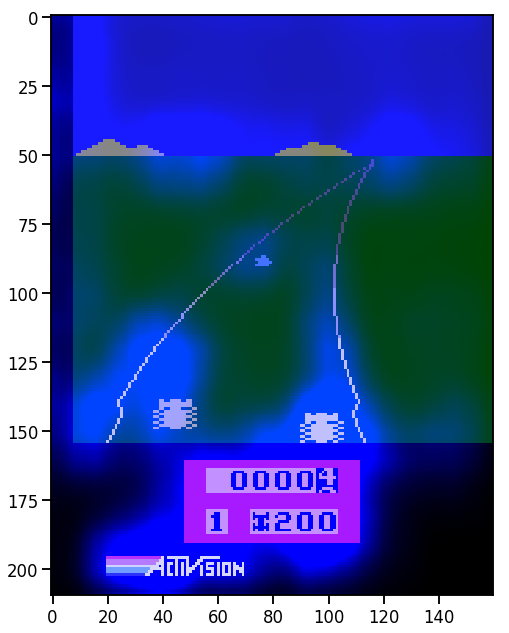

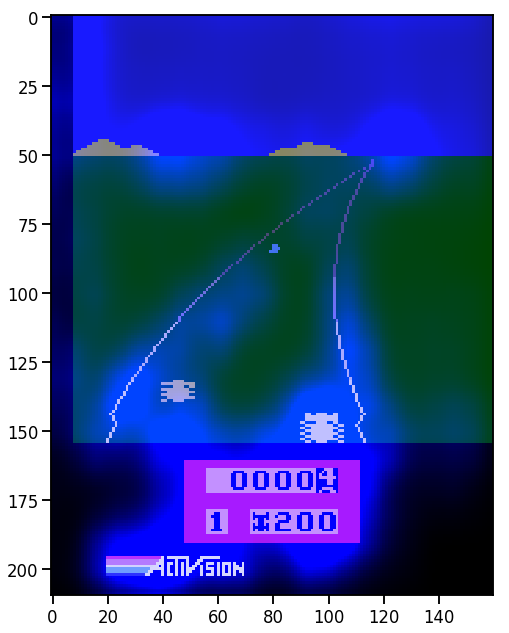

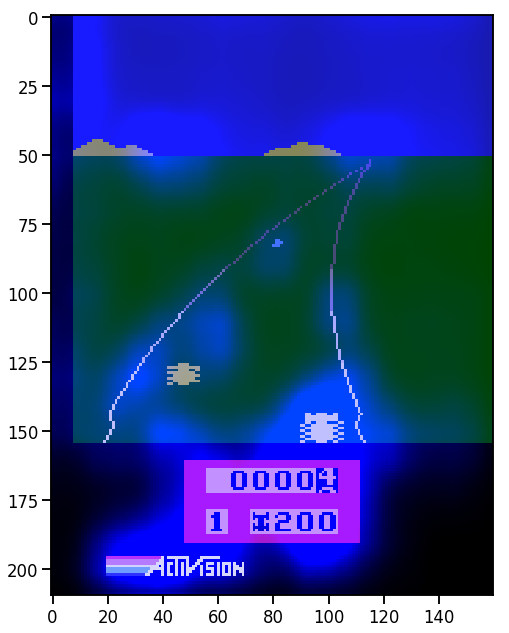

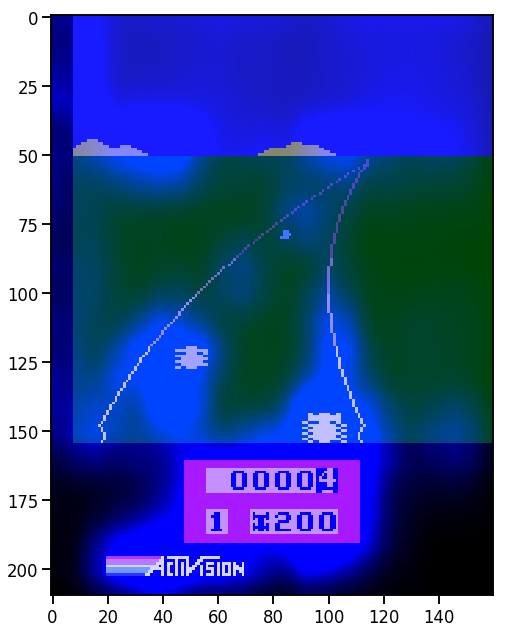

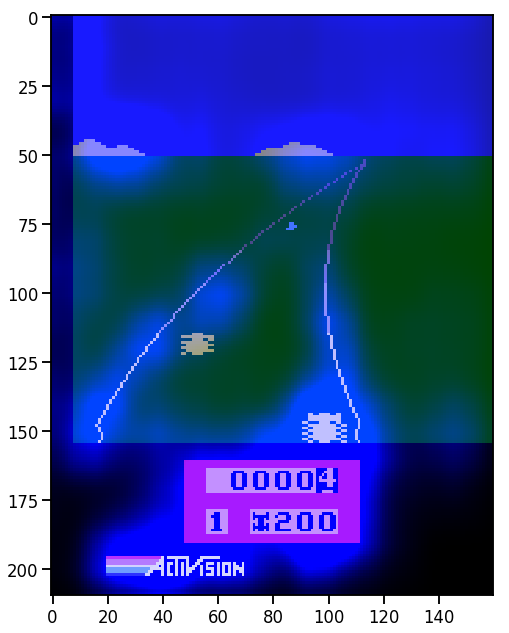

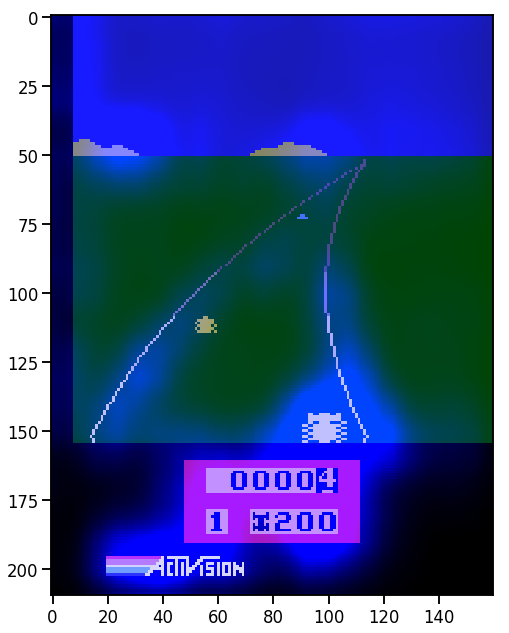

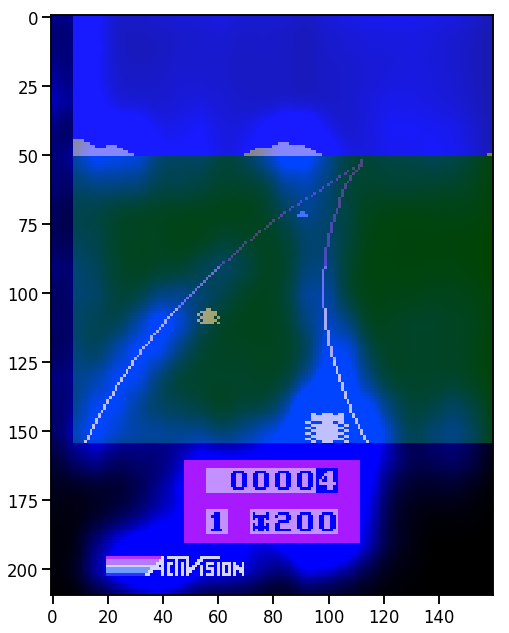

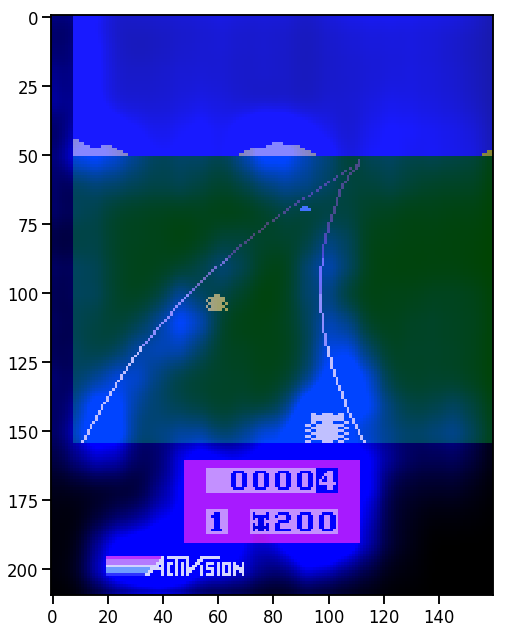

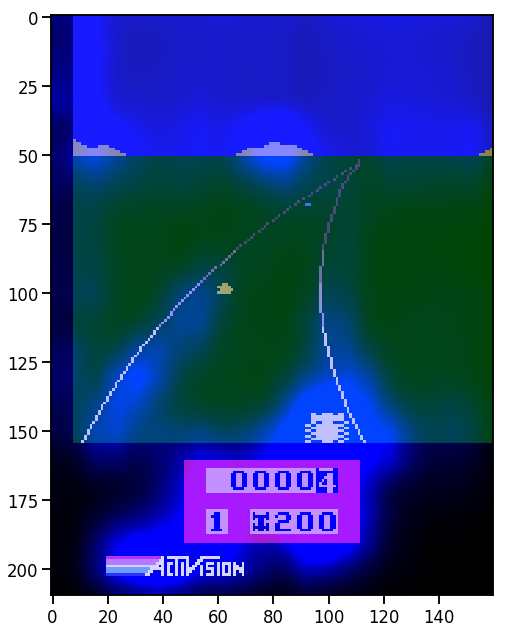

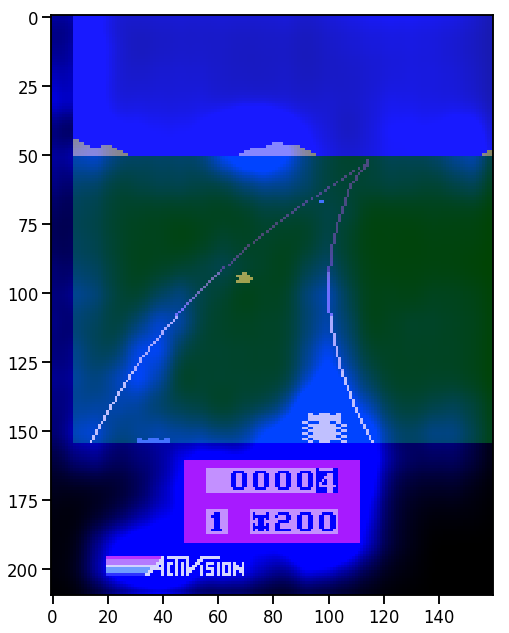

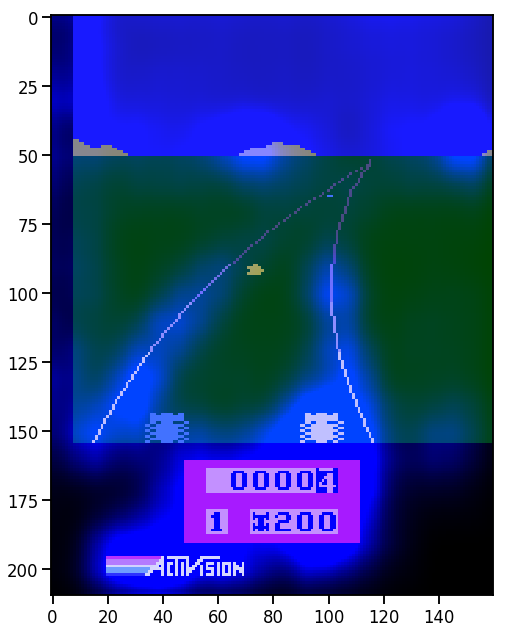

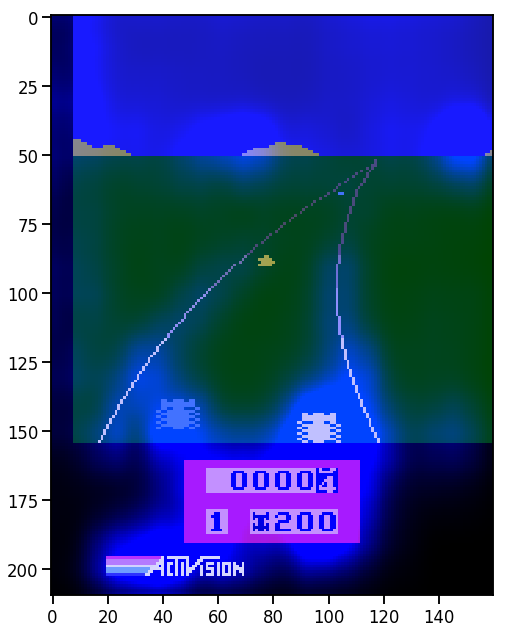

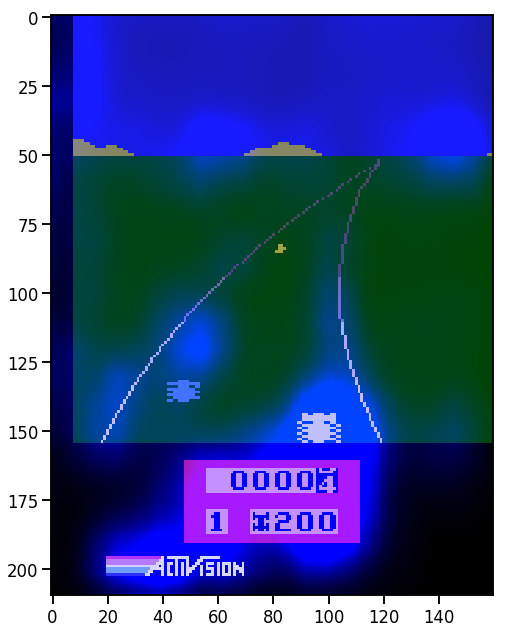

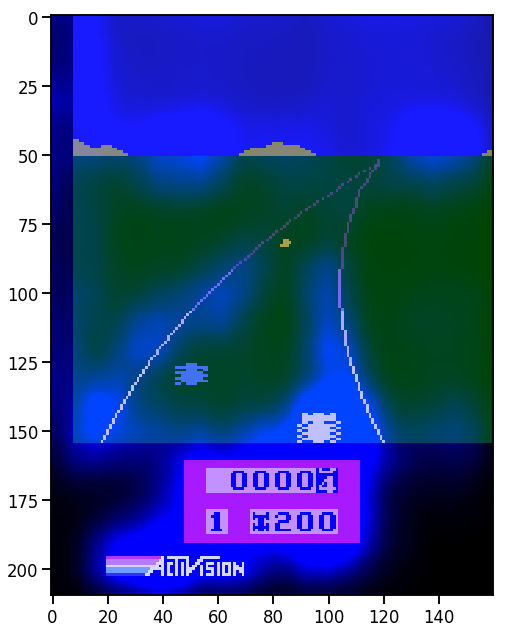

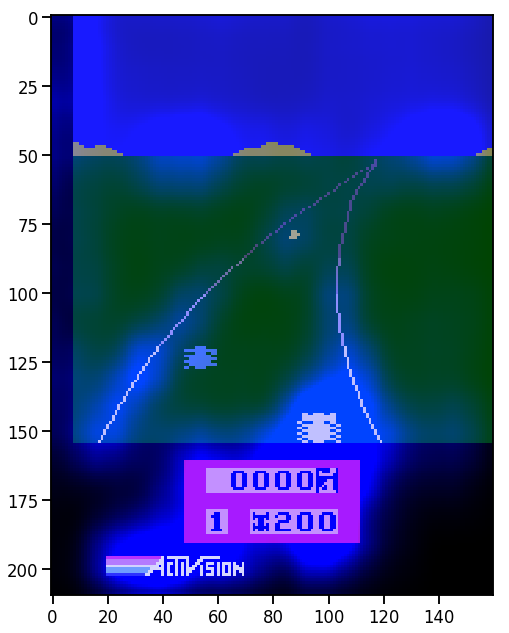

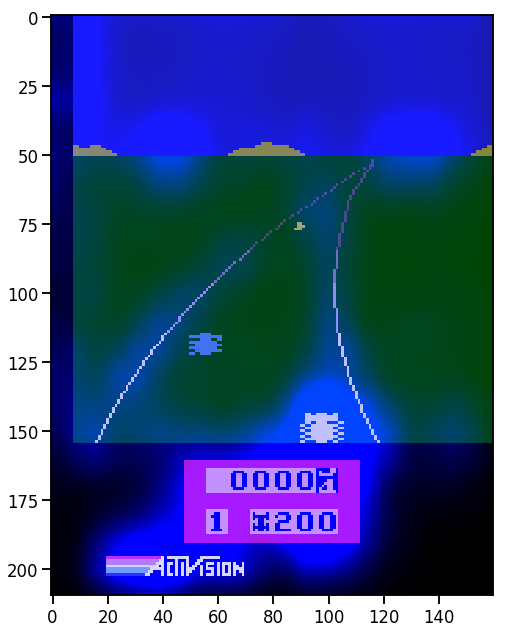

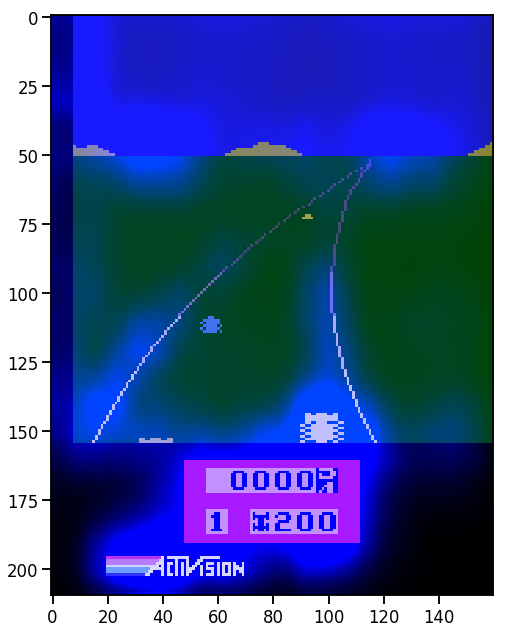

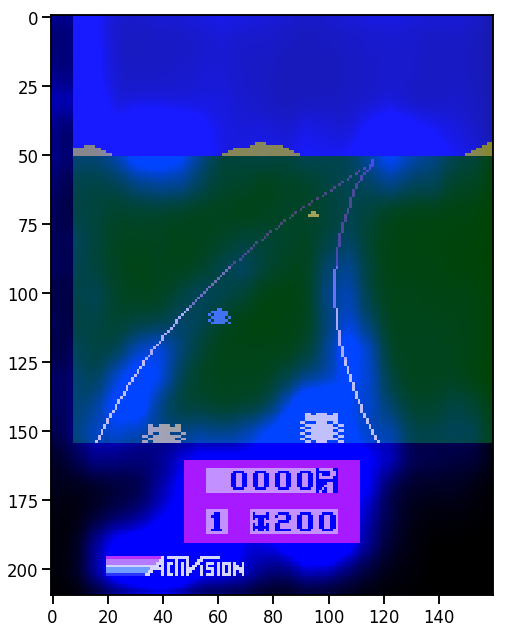

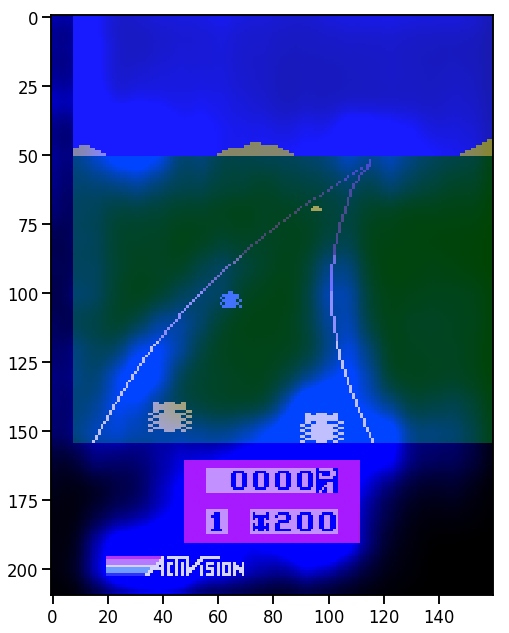

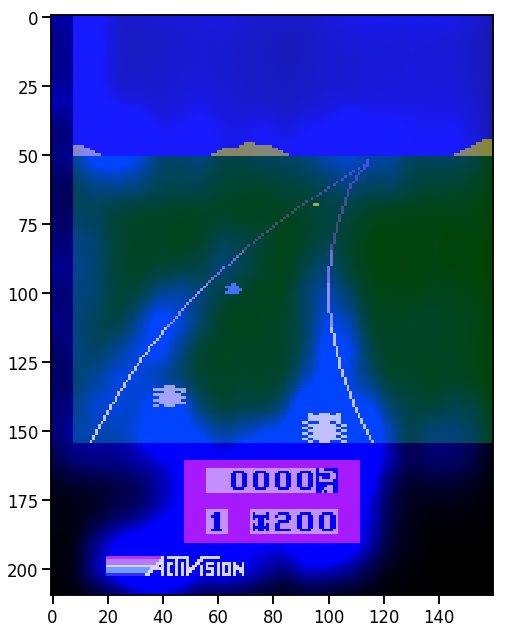

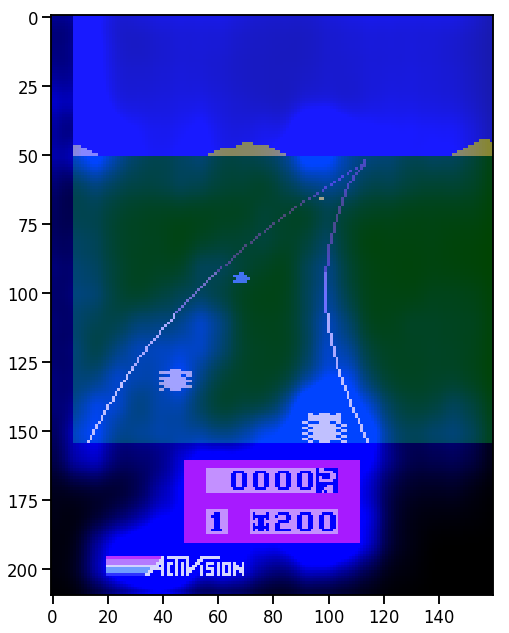

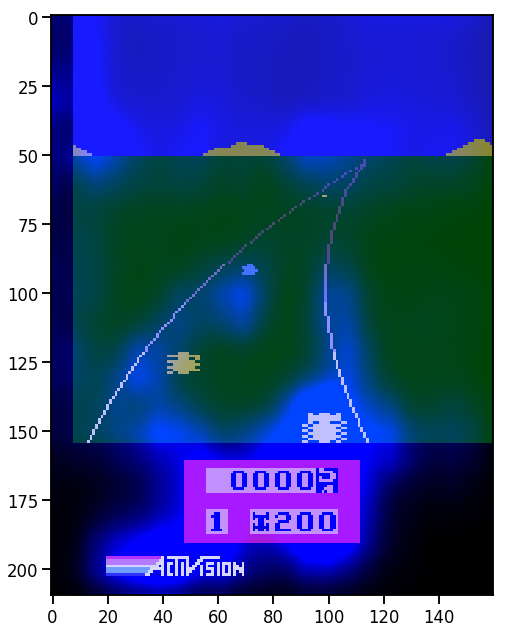

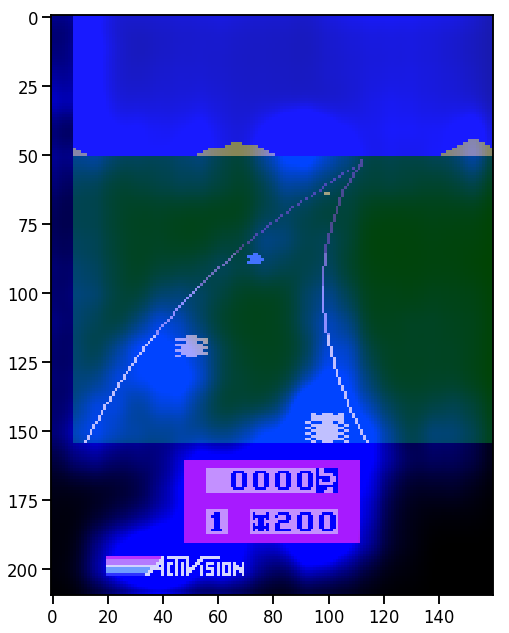

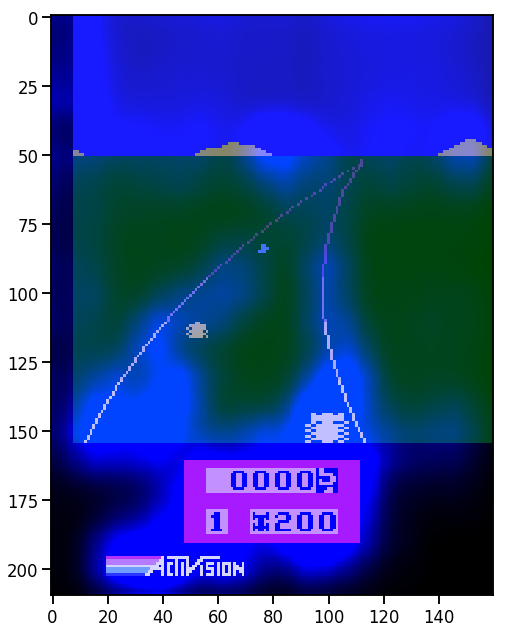

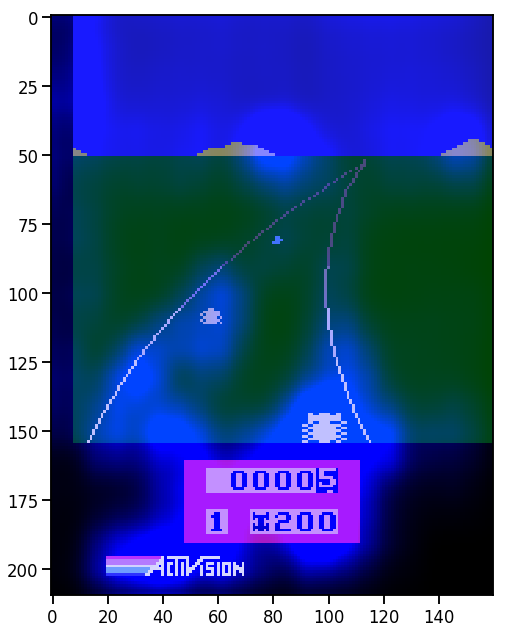

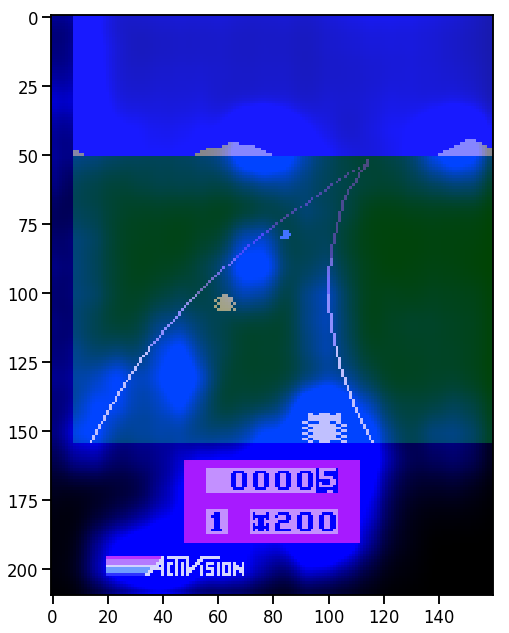

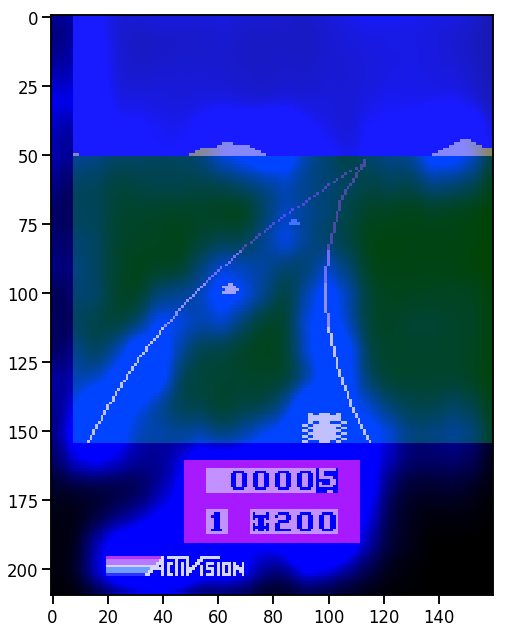

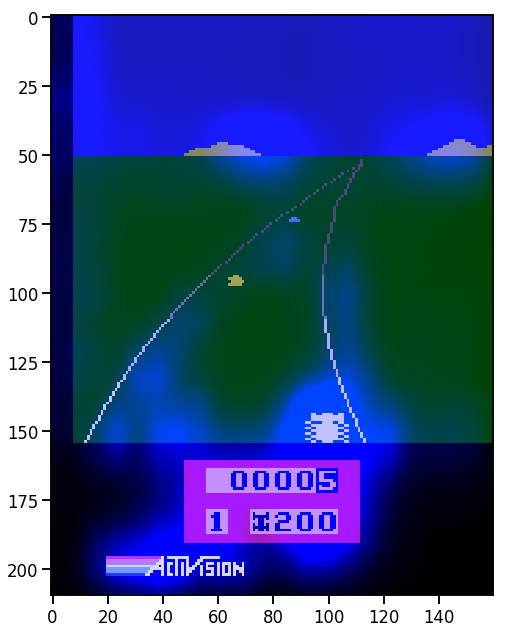

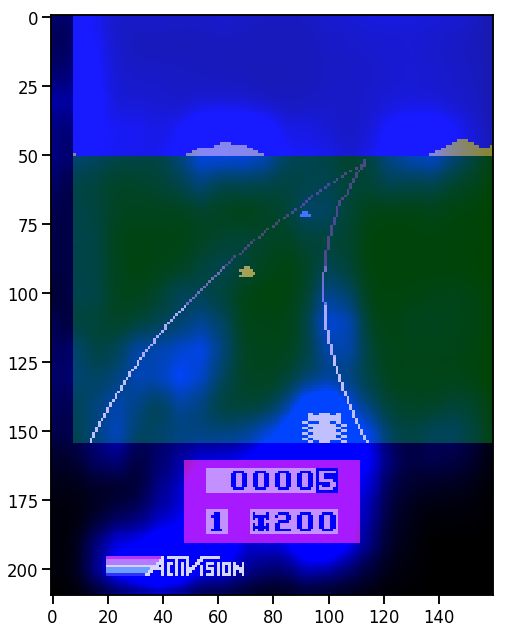

In [24]:
for heatmap in recorder.saliencies:
    plt.figure(figsize=(heatmap.shape[0]/15, heatmap.shape[1]/15))
    plt.imshow(heatmap)
    plt.show()

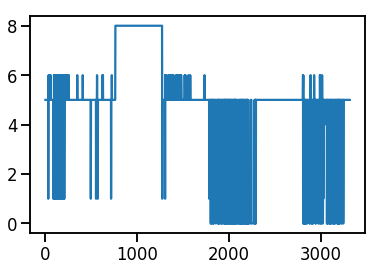

In [25]:
plt.plot(recorder.actions)

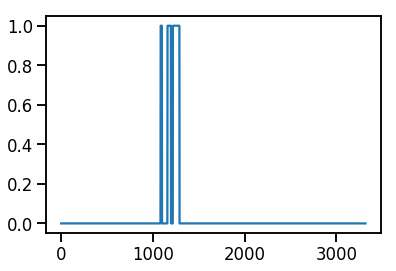

In [26]:
plt.plot(recorder.episode_rewards)

In [27]:
env.reset()

## TSNE

In [28]:
recorder.episode_rewards = [ob for ix, ob in enumerate(recorder.episode_rewards) if (ix%5==0) and (ix<500)]

In [30]:
len(recorder.observations)

100

In [31]:
mapping = {'n_steps': recorder.n_steps,
           'episode_reward': recorder.episode_rewards}
n_frames = 3000 #len(recorder.frames)

In [32]:
embedder = TSNE()
activations = recorder.activations['2nd_to_last']
vectors = [np.squeeze(array)[:,:,0].flatten() for array in activations]
embedding = embedder.fit_transform(vectors)
x, y = zip(*embedding)

In [ ]:
for variable in mapping:
    plt.figure(figsize=(10,5))
    plt.scatter(x, y, c=mapping[variable], alpha=0.3)
    plt.colorbar()
    plt.title(f't-SNE embeddings of {n_frames} frames\ncolored by {variable}')
    plt.show()